# EDA of Garmin and supporting data

In [67]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # pandas dataframe
import os
from glob import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
garmin_base_dir = "../files/Garmin_20241403/DI_CONNECT"

pd.set_option('display.max_columns', 500)


# Building the health DataFrames

Combine json files into dataframes of healh data 
- Garmin daily health data files can be found in the Garmin-folder DI_CONNECT/DI-Connect-Aggregator, which contains json files starting with UDS.
- remove data from before 2020 (no watch), but there are some weird data rows?
- Also wellness data in DI_CONNECT/DI-Connect-Wellness

- Avtivities?

In [87]:
# Files
#  DI-Connect-Aggregator
#  DI-Connect-Welness
# Find activities?

# Function to load JSONs and combine them into a filtered DataFrame
def load_and_filter_json(base, file, substr, start_year=2020):
    all_dfs = []
    path = os.path.join(base, file)
    for root, _, files in os.walk(path):
        json_files = [f for f in sorted(files) if f.endswith('.json') and substr in f]
        for file in json_files:
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
#            df = pd.DataFrame(data) if isinstance(data, list) else pd.DataFrame([data])
            df = pd.json_normalize(data, sep='_')
            all_dfs.append(df)


    # Combining and filtering the data
    if all_dfs:
        full_df = pd.concat(all_dfs, ignore_index=True)

        # Check if 'metaData_calendarDate' column exists before trying to access it
        if 'metaData_calendarDate' in full_df.columns:
            full_df['calendarDate'] = pd.to_datetime(full_df['metaData_calendarDate'])
        elif 'calendarDate' in full_df.columns:
            full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        else:
            print("No 'calendarDate' column found in data")
            return pd.DataFrame()  # Return empty DataFrame if column is missing
        
        full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        full_df = full_df.loc[full_df['calendarDate'].dt.year >= start_year]#, columns_of_interest]
        return full_df
    return pd.DataFrame()  # Return empty DataFrame if no data was loaded
    

start_year = 2020

# DataFrames from json-files, combined
aggregator_df = load_and_filter_json(garmin_base_dir, "DI-Connect-Aggregator", 'UDS', start_year)
sleep_df = load_and_filter_json(garmin_base_dir, "DI-Connect-Wellness", 'sleepData', start_year)
bio_df = load_and_filter_json(garmin_base_dir, "DI-Connect-Wellness", 'userBioMetrics', start_year)

#df.loc[df['column_name'] == some_value]

### Aggregator_df containing most data

In [88]:
print(aggregator_df.columns)
aggregator_df

Index(['userProfilePK', 'calendarDate', 'uuid', 'durationInMilliseconds',
       'consumedKilocalories', 'remainingKilocalories',
       'includesCalorieConsumedData', 'version', 'totalKilocalories',
       'activeKilocalories', 'burnedKilocalories', 'totalDistanceMeters',
       'includesWellnessData', 'includesActivityData', 'bmrKilocalories',
       'wellnessKilocalories', 'wellnessTotalKilocalories',
       'wellnessActiveKilocalories', 'totalSteps', 'dailyStepGoal',
       'wellnessDistanceMeters', 'wellnessStartTimeGmt', 'wellnessEndTimeGmt',
       'wellnessStartTimeLocal', 'wellnessEndTimeLocal', 'highlyActiveSeconds',
       'activeSeconds', 'moderateIntensityMinutes', 'vigorousIntensityMinutes',
       'floorsAscendedInMeters', 'floorsDescendedInMeters',
       'userIntensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate',
       'maxHeartRate', 'restingHeartRate', 'currentDayRestingHeartRate',
       'restingHeartRateTimestamp', 'includesSingleMeasurement',
       'in

,userProfilePK,calendarDate,uuid,durationInMilliseconds,consumedKilocalories,remainingKilocalories,includesCalorieConsumedData,version,totalKilocalories,activeKilocalories,burnedKilocalories,totalDistanceMeters,includesWellnessData,includesActivityData,bmrKilocalories,wellnessKilocalories,wellnessTotalKilocalories,wellnessActiveKilocalories,totalSteps,dailyStepGoal,wellnessDistanceMeters,wellnessStartTimeGmt,wellnessEndTimeGmt,wellnessStartTimeLocal,wellnessEndTimeLocal,highlyActiveSeconds,activeSeconds,moderateIntensityMinutes,vigorousIntensityMinutes,floorsAscendedInMeters,floorsDescendedInMeters,userIntensityMinutesGoal,userFloorsAscendedGoal,minHeartRate,maxHeartRate,restingHeartRate,currentDayRestingHeartRate,restingHeartRateTimestamp,includesSingleMeasurement,includesContinuousMeasurement,includesAllDayPulseOx,includesSleepPulseOx,source,minAvgHeartRate,maxAvgHeartRate,lowestSpo2Value,latestSpo2Value,latestSpo2ValueReadingTimeGmt,latestSpo2ValueReadingTimeLocal,allDayStress_userProfilePK,allDayStress_calendarDate,allDayStress_aggregatorList,bodyBattery_userProfilePK,bodyBattery_calendarDate,bodyBattery_chargedValue,bodyBattery_drainedValue,bodyBattery_bodyBatteryVersion,bodyBattery_bodyBatteryStatList,hydration_userProfilePK,hydration_calendarDate,hydration_valueInML,hydration_activityIntakeInML,hydration_goalInML,hydration_capped,hydration_sweatLossInML,hydration_adjustedGoalInML,hydration_lastEntryTimestampLocal,respiration_userProfilePK,respiration_calendarDate,respiration_avgWakingRespirationValue,respiration_highestRespirationValue,respiration_lowestRespirationValue,respiration_latestRespirationValue,respiration_latestRespirationTimeGMT,averageSpo2Value,netCalorieGoal,dailyTotalFromEpochData,restingCaloriesFromActivity,isVigorousDay
14,86607424,2020-06-18,18de2ff7644a48d3bbc44785a8d746ad,86400000,NaN,1923.0,False,74280002,1923.0,446.0,NaN,10037.0,True,True,1477.0,1923.0,1923.0,446.0,13987.0,10000.0,10037.0,2020-06-17T22:00:00.0,2020-06-18T22:00:00.0,2020-06-18T00:00:00.0,2020-06-19T00:00:00.0,7480.0,1476.0,11.0,0.0,47.313,41.145,180.0,10.0,64.0,128.0,68.0,68.0,1.592518e+12,True,False,False,False,0.0,65.0,121.0,95.0,95.0,2020-06-18T20:14:00.0,2020-06-18T22:14:00.0,86607424.0,2020-06-18,"[{'type': 'TOTAL', 'averageStressLevel': 40, '...",86607424.0,2020-06-18,13.0,38.0,1.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",86607424.0,2020-06-18,0.0,0.0,2129.0,False,302.0,2431.0,2020-06-18T15:20:37.0,86607424.0,2020-06-18,14.0,23.0,4.0,17.0,2020-06-18T22:00:00.0,NaN,NaN,NaN,NaN,NaN
15,86607424,2020-06-19,94fe702aadb840e79b86f5e430e35880,86400000,NaN,1885.0,False,63840002,1885.0,408.0,NaN,9329.0,True,True,1477.0,1885.0,1885.0,408.0,12455.0,10000.0,9329.0,2020-06-18T22:00:00.0,2020-06-19T22:00:00.0,2020-06-19T00:00:00.0,2020-06-20T00:00:00.0,5162.0,2430.0,2.0,10.0,31.366,76.475,180.0,10.0,55.0,160.0,64.0,59.0,1.592604e+12,True,False,True,False,0.0,56.0,158.0,85.0,97.0,2020-06-19T22:00:00.0,2020-06-20T00:00:00.0,86607424.0,2020-06-19,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",86607424.0,2020-06-19,86.0,38.0,1.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",86607424.0,2020-06-19,0.0,0.0,2129.0,False,467.0,2596.0,2020-06-19T16:27:16.0,86607424.0,2020-06-19,13.0,21.0,6.0,20.0,2020-06-19T22:00:00.0,96.0,NaN,NaN,NaN,NaN
16,86607424,2020-06-20,734de901672a4d10834648af9183a61e,86400000,NaN,2456.0,False,82320003,2456.0,975.0,NaN,21728.0,True,True,1481.0,2456.0,2456.0,975.0,26379.0,10000.0,21728.0,2020-06-19T22:00:00.0,2020-06-20T22:00:00.0,2020-06-20T00:00:00.0,2020-06-21T00:00:00.0,9014.0,2798.0,20.0,88.0,60.259,66.790,180.0,10.0,53.0,159.0,62.0,58.0,1.592690e+12,True,False,True,True,0.0,54.0,156.0,84.0,94.0,2020-06-20T22:00:00.0,2020-06-21T00:00:00.0,86607424.0,2020-06-20,"[{'type': 'TOTAL', 'averageStressLevel': 15, '...",86607424.0,2020-06-20,74.0,71.0,1.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",86607424.0,2020-06-20,0.0,0.0,2129.0,False,988.0,3117.0,2020-06-20T15:54:58.0,86607424.0,2020-06-20,12.0

In [89]:
# chose only intersting columns

focus_columns_agg = ['calendarDate', 'totalKilocalories', 'activeKilocalories', 'allDayStress_aggregatorList', 
                       'includesWellnessData', 'includesActivityData',
                       'totalSteps', 'highlyActiveSeconds', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 
                       'highlyActiveSeconds', 'userIntensityMinutesGoal', 
                       'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'minAvgHeartRate', 'maxAvgHeartRate',
                       'bodyBattery_chargedValue', 'bodyBattery_drainedValue', 'bodyBattery_bodyBatteryStatList',
                         'restingCaloriesFromActivity', 'isVigorousDay']

focus_agg_df = aggregator_df[focus_columns_agg]

#focus_agg_df =  aggregator_df.loc[aggregator_df['calendarDate'].dt.year<=2020, focus_columns_agg]
focus_agg_df

,calendarDate,totalKilocalories,activeKilocalories,allDayStress_aggregatorList,includesWellnessData,includesActivityData,totalSteps,highlyActiveSeconds,moderateIntensityMinutes,vigorousIntensityMinutes,highlyActiveSeconds,userIntensityMinutesGoal,minHeartRate,maxHeartRate,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,bodyBattery_chargedValue,bodyBattery_drainedValue,bodyBattery_bodyBatteryStatList,restingCaloriesFromActivity,isVigorousDay
14,2020-06-18,1923.0,446.0,"[{'type': 'TOTAL', 'averageStressLevel': 40, '...",True,True,13987.0,7480.0,11.0,0.0,7480.0,180.0,64.0,128.0,68.0,65.0,121.0,13.0,38.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
15,2020-06-19,1885.0,408.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,12455.0,5162.0,2.0,10.0,5162.0,180.0,55.0,160.0,64.0,56.0,158.0,86.0,38.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
16,2020-06-20,2456.0,975.0,"[{'type': 'TOTAL', 'averageStressLevel': 15, '...",True,True,26379.0,9014.0,20.0,88.0,9014.0,180.0,53.0,159.0,62.0,54.0,156.0,74.0,71.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
17,2020-06-21,2202.0,734.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,12401.0,5280.0,52.0,4.0,5280.0,180.0,50.0,139.0,60.0,52.0,134.0,40.0,81.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
18,2020-06-22,2017.0,549.0,"[{'type': 'TOTAL', 'averageStressLevel': 25, '...",True,True,15256.0,6691.0,5.0,43.0,6691.0,180.0,53.0,152.0,60.0,54.0,149.0,49.0,54.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,2024-03-10,2038.0,581.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,13169.0,3086.0,3.0,25.0,3086.0,500.0,50.0,148.0,60.0,51.0,146.0,52.0,11.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",24.0,True
1375,2024-03-11,2231.0,774.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,12551.0,2202.0,5.0,38.0,2202.0,500.0,54.0,161.0,60.0,55.0,160.0,79.0,68.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",38.0,True
1376,2024-03-12,2762.0,1305.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,11733.0,3126.0,44.0,98.0,3126.0,500.0,55.0,147.0,60.0,56.0,146.0,42.0,68.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",170.0,True
1377,2024-03-13,2372.0,915.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,16581.0,4380.0,19.0,49.0,4380.0,500.0,55.0,148.0,60.0,55.0,146.0,65.0,53.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",65.0,True


### Sleep_df, hours of sleep I guess

In [90]:
sleep_df.head()

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,retro,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,lowestRespiration,highestRespiration,spo2SleepSummary_userProfilePk,spo2SleepSummary_deviceId,spo2SleepSummary_sleepMeasurementStartGMT,spo2SleepSummary_sleepMeasurementEndGMT,spo2SleepSummary_alertThresholdValue,spo2SleepSummary_averageSPO2,spo2SleepSummary_averageHR,spo2SleepSummary_lowestSPO2
0,2020-06-17T21:00:00.0,2020-06-18T04:00:00.0,2020-06-18,UNCONFIRMED,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-18T21:25:00.0,2020-06-19T03:46:00.0,2020-06-19,ENHANCED_CONFIRMED_FINAL,False,2880.0,15600.0,3720.0,660.0,0.0,16.0,6.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-19T19:58:00.0,2020-06-20T04:14:00.0,2020-06-20,ENHANCED_CONFIRMED_FINAL,False,3660.0,16020.0,8100.0,840.0,1140.0,16.0,7.0,21.0,86607424.0,3.334930e+09,2020-06-19T20:52:00.0,2020-06-20T04:00:00.0,0.0,93.0,60.0,84.0
3,2020-06-20T21:56:00.0,2020-06-21T04:52:00.0,2020-06-21,ENHANCED_CONFIRMED_FINAL,False,3120.0,15180.0,5640.0,1020.0,0.0,15.0,7.0,18.0,86607424.0,3.334930e+09,2020-06-20T21:57:00.0,2020-06-21T04:00:00.0,NaN,95.0,58.0,93.0
4,2020-06-21T21:09:00.0,2020-06-22T04:55:00.0,2020-06-22,ENHANCED_CONFIRMED_FINAL,False,3120.0,17400.0,7320.0,120.0,0.0,16.0,6.0,21.0,86607424.0,3.334930e+09,2020-06-21T21:10:00.0,2020-06-22T04:00:00.0,0.0,96.0,60.0,87.0


In [91]:
print(sleep_df.columns)
focus_columns_well = ['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate',
                     'deepSleepSeconds', 'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds','unmeasurableSeconds',
                     ]

Index(['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate',
       'sleepWindowConfirmationType', 'retro', 'deepSleepSeconds',
       'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds',
       'unmeasurableSeconds', 'averageRespiration', 'lowestRespiration',
       'highestRespiration', 'spo2SleepSummary_userProfilePk',
       'spo2SleepSummary_deviceId',
       'spo2SleepSummary_sleepMeasurementStartGMT',
       'spo2SleepSummary_sleepMeasurementEndGMT',
       'spo2SleepSummary_alertThresholdValue', 'spo2SleepSummary_averageSPO2',
       'spo2SleepSummary_averageHR', 'spo2SleepSummary_lowestSPO2'],
      dtype='object')


In [92]:
focus_sleep_df = sleep_df[focus_columns_well]
focus_sleep_df

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds
0,2020-06-17T21:00:00.0,2020-06-18T04:00:00.0,2020-06-18,NaN,NaN,NaN,NaN,NaN
1,2020-06-18T21:25:00.0,2020-06-19T03:46:00.0,2020-06-19,2880.0,15600.0,3720.0,660.0,0.0
2,2020-06-19T19:58:00.0,2020-06-20T04:14:00.0,2020-06-20,3660.0,16020.0,8100.0,840.0,1140.0
3,2020-06-20T21:56:00.0,2020-06-21T04:52:00.0,2020-06-21,3120.0,15180.0,5640.0,1020.0,0.0
4,2020-06-21T21:09:00.0,2020-06-22T04:55:00.0,2020-06-22,3120.0,17400.0,7320.0,120.0,0.0
...,...,...,...,...,...,...,...,...
1359,2024-03-09T22:12:00.0,2024-03-10T07:39:00.0,2024-03-10,9780.0,18060.0,5880.0,300.0,0.0
1360,2024-03-10T18:04:00.0,2024-03-11T04:45:00.0,2024-03-11,4560.0,22500.0,9420.0,1980.0,0.0
1361,2024-03-11T20:14:00.0,2024-03-12T04:25:00.0,2024-03-12,2580.0,17880.0,8160.0,840.0,0.0
1362,2024-03-12T22:03:00.0,2024-03-13T02:10:00.0,2024-03-13,5220.0,4680.0,2760.0,240.0,1920.0


### bio_df containing vo2max

In [93]:
vo2max_df = bio_df[['calendarDate', 'vo2MaxRunning']]
vo2max_df

,calendarDate,vo2MaxRunning
0,2020-06-18 00:00:00.000,42.0
1,2020-06-18 00:00:00.000,42.0
2,2020-06-18 05:30:15.000,NaN
3,2020-06-18 10:33:40.140,NaN
4,2020-06-18 10:36:33.958,NaN
...,...,...
1362,2024-03-07 00:00:00.000,51.0
1363,2024-03-09 00:00:00.000,51.0
1364,2024-03-10 00:00:00.000,51.0
1365,2024-03-12 00:00:00.000,50.0


In [104]:
#focus_agg_df[['allDayStress_aggregatorList']].iat[0,0]

def extract_total_average_stress(row):
    if isinstance(row, list):  # Check if the row is actually a list
        total_entry = next((item for item in row if item['type'] == 'TOTAL'), None)
        return total_entry['averageStressLevel'] if total_entry else None
    return None  # Return None or a default value if the row is not a list


# Apply the function and create a new column
focus_agg_df.loc[:, 'totalAverageStressLevel'] = focus_agg_df['allDayStress_aggregatorList'].apply(extract_total_average_stress)

focus_agg_df

,calendarDate,totalKilocalories,activeKilocalories,allDayStress_aggregatorList,includesWellnessData,includesActivityData,totalSteps,highlyActiveSeconds,moderateIntensityMinutes,vigorousIntensityMinutes,highlyActiveSeconds,userIntensityMinutesGoal,minHeartRate,maxHeartRate,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,bodyBattery_chargedValue,bodyBattery_drainedValue,bodyBattery_bodyBatteryStatList,restingCaloriesFromActivity,isVigorousDay,totalAverageStressLevel
14,2020-06-18,1923.0,446.0,"[{'type': 'TOTAL', 'averageStressLevel': 40, '...",True,True,13987.0,7480.0,11.0,0.0,7480.0,180.0,64.0,128.0,68.0,65.0,121.0,13.0,38.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,40.0
15,2020-06-19,1885.0,408.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,12455.0,5162.0,2.0,10.0,5162.0,180.0,55.0,160.0,64.0,56.0,158.0,86.0,38.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,20.0
16,2020-06-20,2456.0,975.0,"[{'type': 'TOTAL', 'averageStressLevel': 15, '...",True,True,26379.0,9014.0,20.0,88.0,9014.0,180.0,53.0,159.0,62.0,54.0,156.0,74.0,71.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,15.0
17,2020-06-21,2202.0,734.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,12401.0,5280.0,52.0,4.0,5280.0,180.0,50.0,139.0,60.0,52.0,134.0,40.0,81.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,29.0
18,2020-06-22,2017.0,549.0,"[{'type': 'TOTAL', 'averageStressLevel': 25, '...",True,True,15256.0,6691.0,5.0,43.0,6691.0,180.0,53.0,152.0,60.0,54.0,149.0,49.0,54.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,2024-03-10,2038.0,581.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,13169.0,3086.0,3.0,25.0,3086.0,500.0,50.0,148.0,60.0,51.0,146.0,52.0,11.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",24.0,True,29.0
1375,2024-03-11,2231.0,774.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,12551.0,2202.0,5.0,38.0,2202.0,500.0,54.0,161.0,60.0,55.0,160.0,79.0,68.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",38.0,True,20.0
1376,2024-03-12,2762.0,1305.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,11733.0,3126.0,44.0,98.0,3126.0,500.0,55.0,147.0,60.0,56.0,146.0,42.0,68.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",170.0,True,20.0
1377,2024-03-13,2372.0,915.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,16581.0,4380.0,19.0,49.0,4380.0,500.0,55.0,148.0,60.0,55.0,146.0,65.0,53.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",65.0,True,29.0


In [106]:
focus_agg_df[['bodyBattery_bodyBatteryStatList']].iat[0,0]


[{'bodyBatteryStatType': 'HIGHEST',
  'statsValue': 53,
  'bodyBatteryStatus': 'MEASURED',
  'statTimestamp': '2020-06-18T08:56:00.0'},
 {'bodyBatteryStatType': 'LOWEST',
  'statsValue': 25,
  'bodyBatteryStatus': 'MEASURED',
  'statTimestamp': '2020-06-18T20:24:00.0'},
 {'bodyBatteryStatType': 'MOSTRECENT',
  'statsValue': 25,
  'bodyBatteryStatus': 'MEASURED',
  'statTimestamp': '2020-06-18T22:00:00.0'},
 {'bodyBatteryStatType': 'ENDOFDAY',
  'statsValue': 25,
  'bodyBatteryStatus': 'MEASURED',
  'statTimestamp': '2020-06-18T21:25:00.0'}]

## Join df's by calendarDate

- get: calendarDate, restingHeartRate, averageStressLevel, sleepingSeconds 

# Project 1: Compare stress levels to different time periods

1. Timeseries for average Stress: 
    - semesters and seasons
    - months / general seasons
    - weekdays
    - 24H of day
    - 168 hours of week
    - calplot
   


In [517]:
# I got this data via a script for downloading directly through garminconnect
health_df = pd.read_csv("GarminHealth.csv")
health_df = health_df[['Date', 'resting_HR', 'average_stress', 'sleeping_hours']]
health_df


,Date,resting_HR,average_stress,sleeping_hours
0,2021-07-01,60,30,7.716667
1,2021-07-02,60,25,6.200000
2,2021-07-03,59,30,6.633333
3,2021-07-04,60,22,8.416667
4,2021-07-05,57,23,6.633333
...,...,...,...,...
1365,2024-03-27,58,22,9.100000
1366,2024-03-28,58,27,2.233333
1367,2024-03-29,59,27,5.950000
1368,2024-03-30,60,43,9.316667


# Time series average stress per semester

In [518]:
health_df['Date'] = pd.to_datetime(health_df['Date'])

# Set the date column as the index
health_df.set_index('Date', inplace=True)

In [519]:
# Define custom labels and colors
labels_colors = {
    "2021 - 1st": ("Finishing my MSc in astrophysics", "black"),
    "2021 - 2nd": ("Novo Nordisk", "blue"),
    "2022 - 1st": ("Novo Nordisk", "blue"),
    "2022 - 2nd": ("KEA, free bird", "red"),
    "2023 - 1st": ("KEA, teaching here and there", "darkred"),
    "2023 - 2nd": ("KEA, system development ITA", "maroon"),
    "2024 - 1st": ("KEA, free bird", "red")
}

In [520]:
# Define semesters and add them to the df
health_df['Semester'] = (health_df.index.month - 1) // 6 + 1  # Jan-Jun will be 1, Jul-Dec will be 2

# Create a year-semester identifier, like "2021 - 1st", "2021 - 2nd"
health_df['YearSemester'] = health_df.index.year.astype(str) + ' - ' + health_df['Semester'].replace({1: '1st', 2: '2nd'})

# Group by this new identifier
semester_stress = health_df.groupby('YearSemester')['average_stress'].mean()
semester_restHR = health_df.groupby('YearSemester')['resting_HR'].mean()


## Flag days

Sick: October 12-30 2023

And alcohol? No idea ... 

In [521]:
# Initialize the 'Sick' column to False
health_df['Sick'] = False

# Set 'Sick' to True for the specific date ranges#health_df.loc['2023-10-12':'2023-10-30', 'Sick'] = True

## Plot stress levels per semester

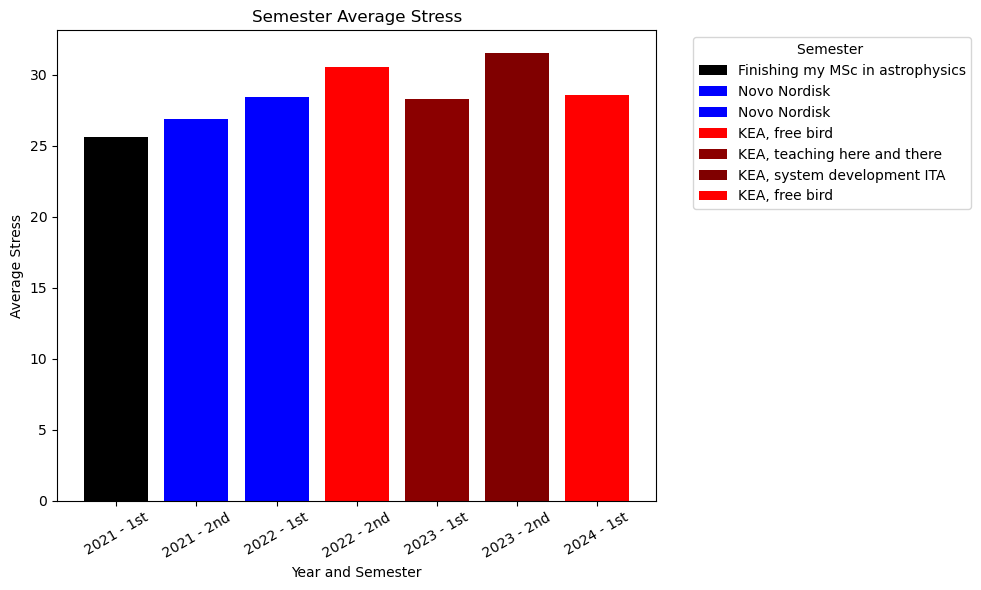

In [525]:
# Plotting stress levels
fig, ax = plt.subplots(figsize=(10, 6))
for index, value in semester_stress.items():  # Use .items() instead of .iteritems()
    color = labels_colors[index][1]
    label = labels_colors[index][0]
    bar = ax.bar(index, value, color=color, label=label)

plt.title('Semester Average Stress')
plt.xlabel('Year and Semester')
plt.ylabel('Average Stress')
plt.xticks(rotation=30)

# Handling the legend to display it outside the plot
plt.legend(title='Semester ', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend outside of the plot
plt.tight_layout()

plt.show()


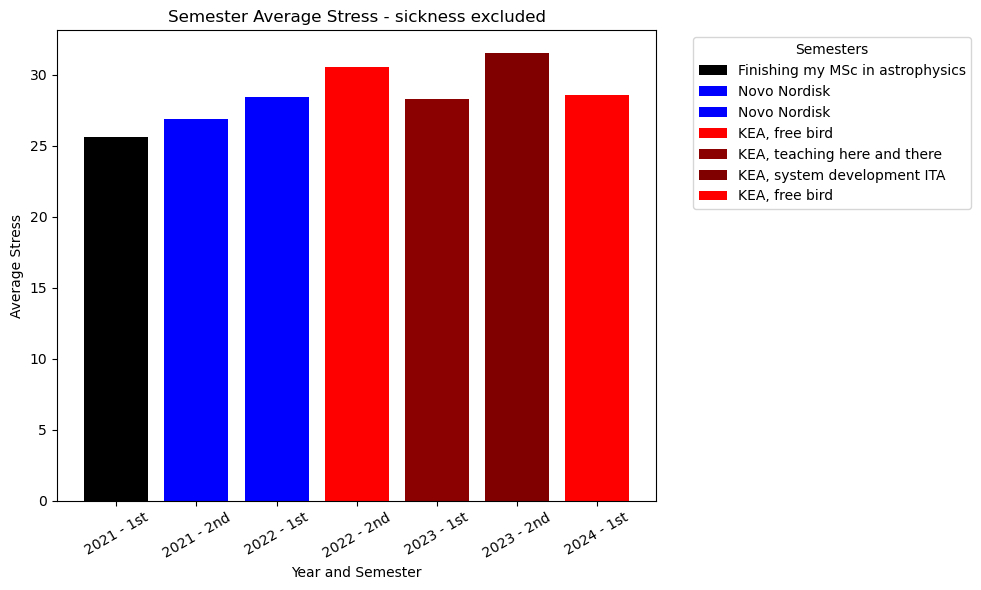

In [526]:
filtered_df = health_df[health_df['Sick'] == False]

# Now calculate the mean stress without including sick days
semester_stress_exclude_sick = filtered_df.groupby('YearSemester')['average_stress'].mean()

# Plotting stress levels
fig, ax = plt.subplots(figsize=(10, 6))
for index, value in semester_stress_exclude_sick.items():
    color = labels_colors[index][1]
    label = labels_colors[index][0]
    bar = ax.bar(index, value, color=color, label=label)

plt.title('Semester Average Stress - sickness excluded')
plt.xlabel('Year and Semester')
plt.ylabel('Average Stress')
plt.xticks(rotation=30)

# Handling the legend to display it outside the plot
plt.legend(title='Semesters', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend outside of the plot
plt.tight_layout()

plt.show()


## Time series, average stress per month

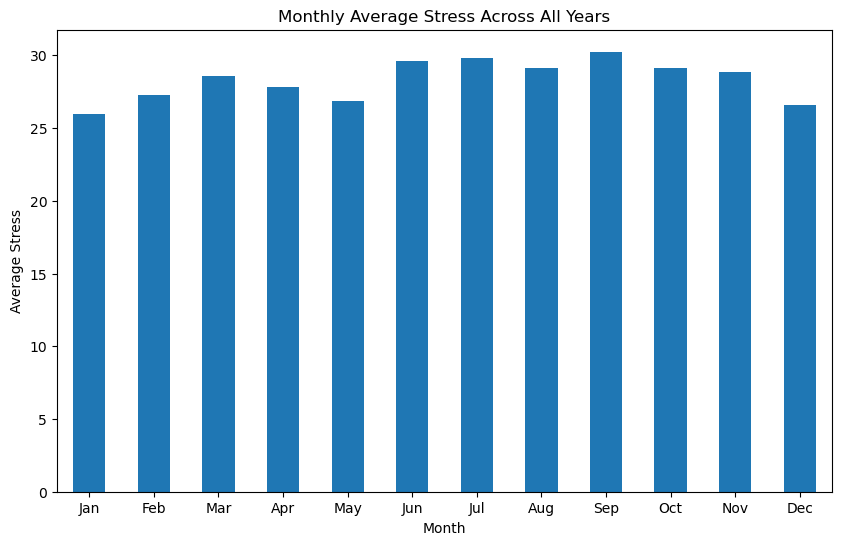

In [527]:
# Group by month regardless of year
monthly_stress = health_df['average_stress'].groupby(health_df.index.month).mean()

# Plotting
monthly_stress.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Average Stress Across All Years')
plt.xlabel('Month')
plt.ylabel('Average Stress')
plt.xticks(rotation=0, ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Setting custom labels
plt.show()


## Average stress per weekday

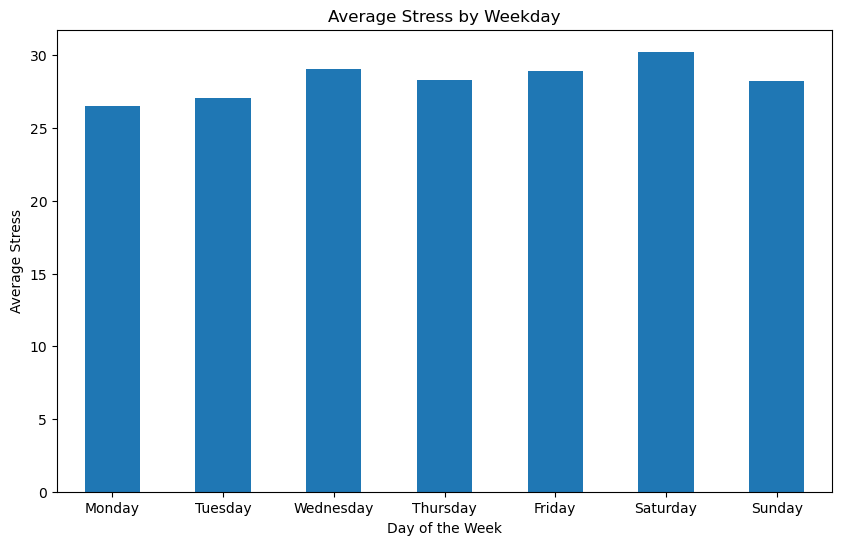

In [528]:
# Group by day of the week
weekday_stress = health_df['average_stress'].groupby(health_df.index.dayofweek).mean()

# Plotting
weekday_stress.plot(kind='bar', figsize=(10, 6))
plt.title('Average Stress by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Stress')
plt.xticks(rotation = 0, ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Setting custom labels
plt.show()


## Are there any weekdays more stressful during the different semesters?
Especially I am curious if I have been more stressed the days up to Tuesdays in 2023 - 2nd semnester.

In [529]:
health_df['Weekday'] = health_df.index.dayofweek  # Add weekday information
health_df['Semester'] = health_df.index.month // 7 + 1  # Define semesters based on months
health_df['YearSemester'] = health_df.index.year.astype(str) + ' - ' + health_df['Semester'].replace({1: '1st', 2: '2nd'})

# Collect the average stress for each day of the week, for each semester
weekday_stress_per_semester = health_df.groupby(['YearSemester', 'Weekday'])['average_stress'].mean().unstack()

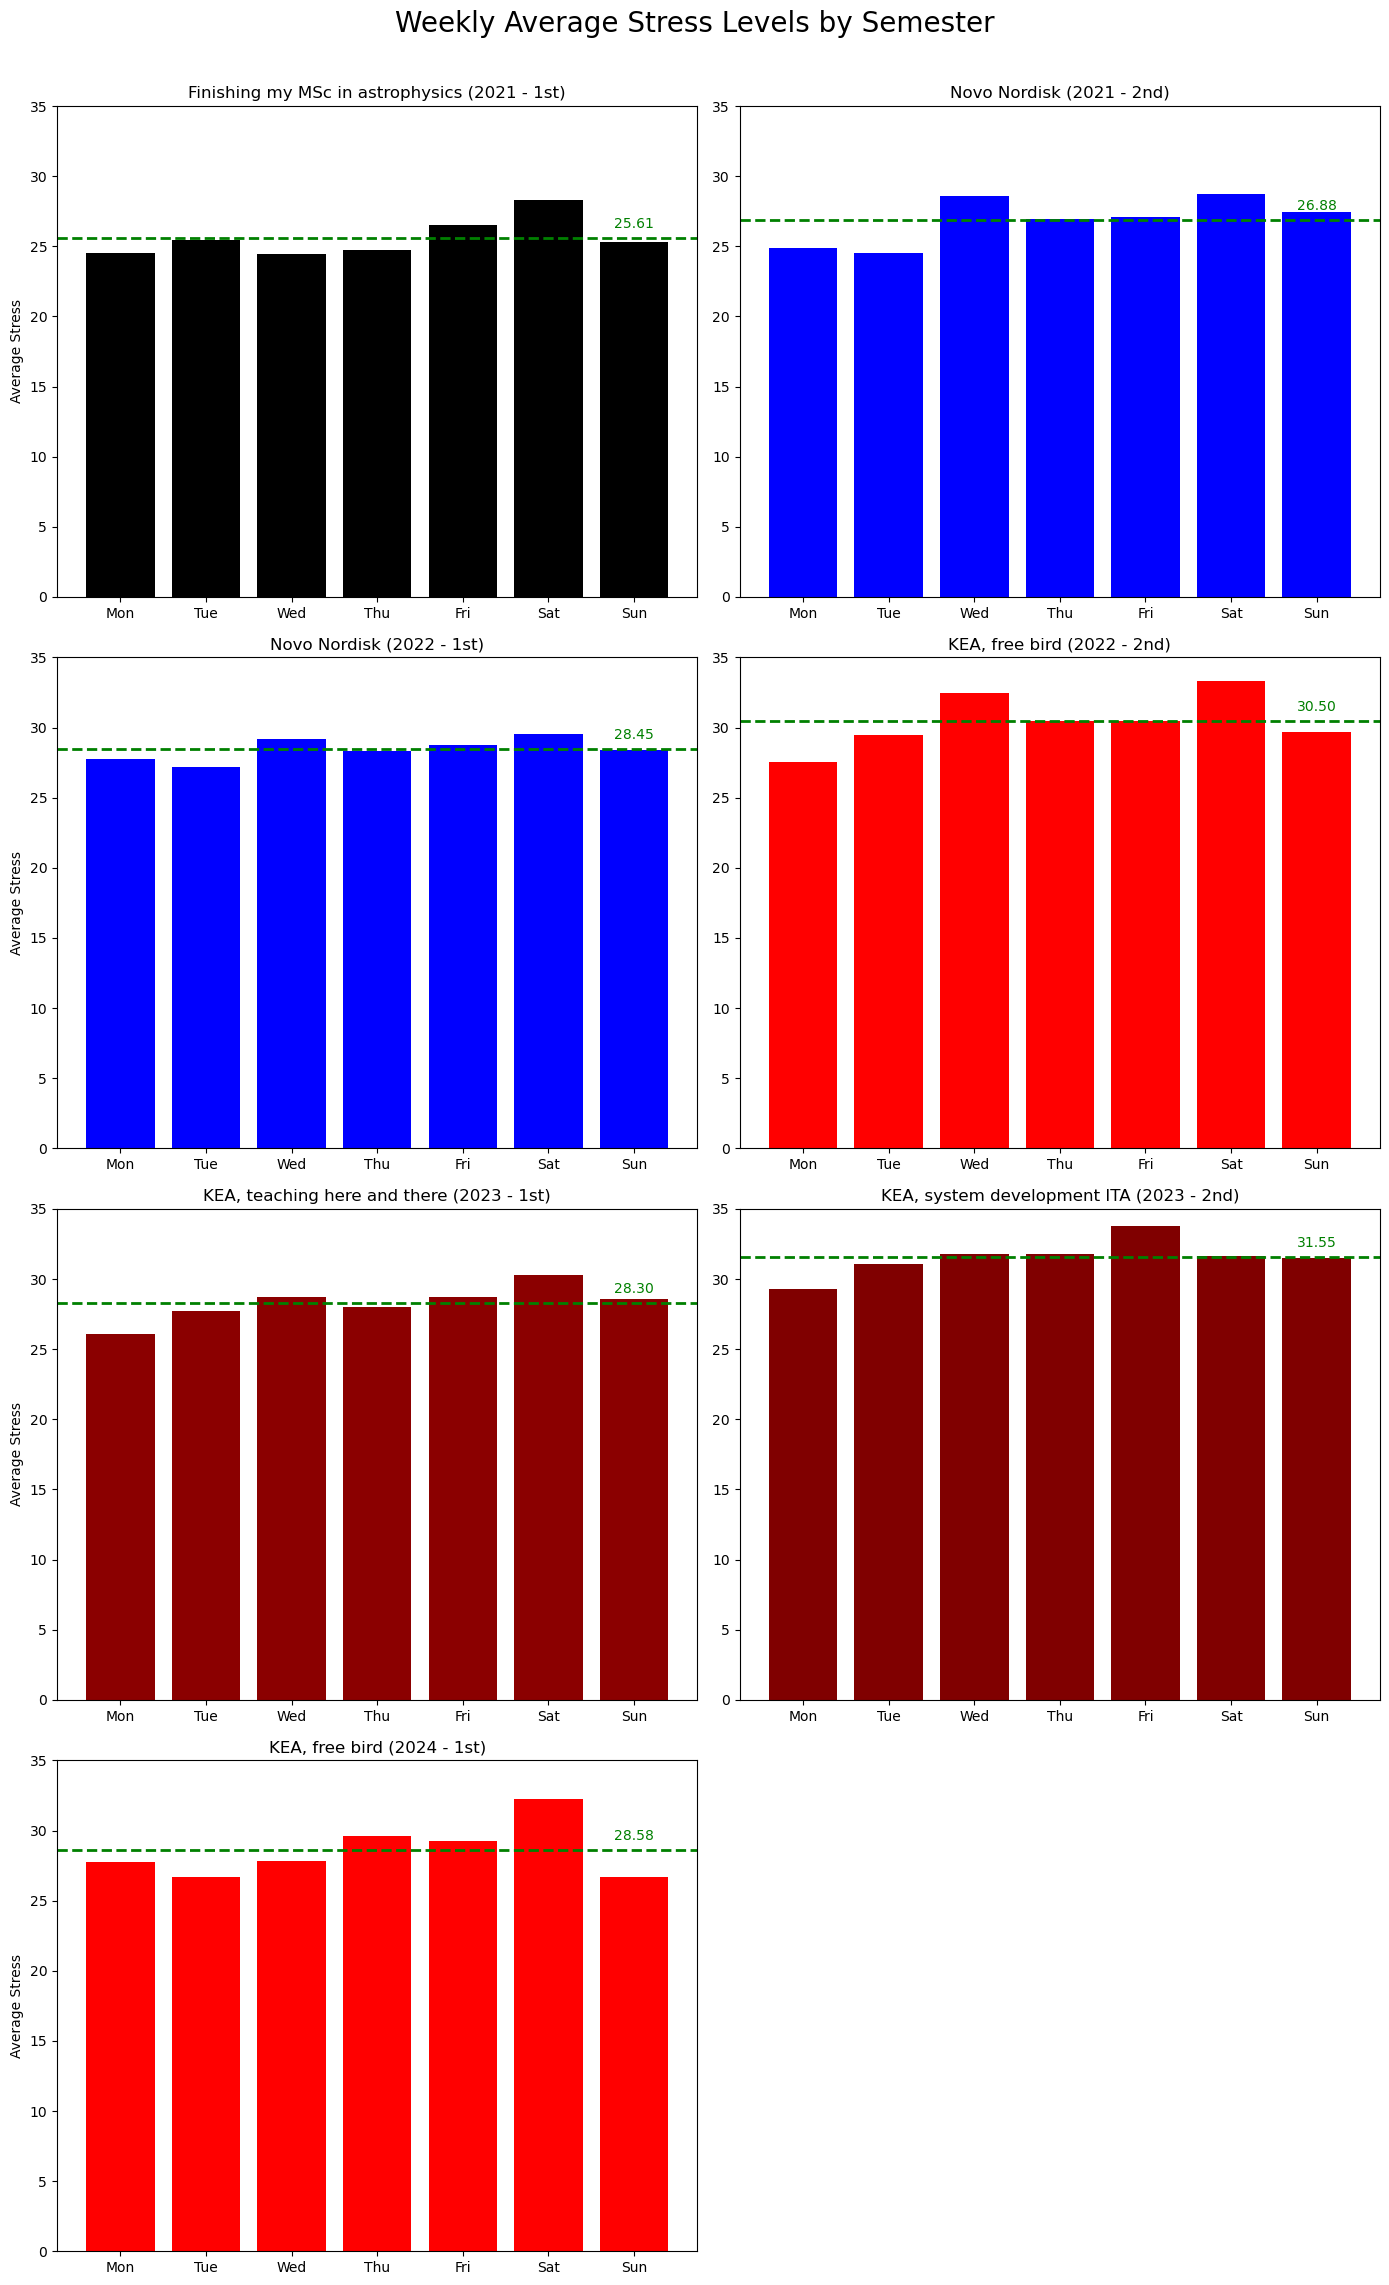

In [530]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 24))  # Adjusted for additional plots
fig.suptitle('Weekly Average Stress Levels by Semester', fontsize=20)

# Flatten axes for easy iteration
axes = axes.flatten()

# Number of semesters to plot
num_semesters = len(labels_colors)

# Total number of subplots (rows * columns)
total_plots = 4 * 2  # Update this based on the actual layout of nrows x ncols

# Plot each semester's data in a different subplot
for i, (semester, data) in enumerate(weekday_stress_per_semester.iterrows()):
    if i >= num_semesters:
        break  # Break if there are more subplots than semesters
    ax = axes[i]
    color = labels_colors[semester][1]
    ax.bar(x=data.index, height=data.values, color=color)
    ax.set_title(f"{labels_colors[semester][0]} ({semester})", fontsize=12)
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    ax.set_ylabel('Average Stress' if i % 2 == 0 else '')
    ax.set_ylim(0, 35)
    mean_stress = data.mean()
    ax.axhline(y=mean_stress, color='green', linestyle='--', linewidth=2)
    ax.text(data.index[-1], mean_stress + 0.5, f'{mean_stress:.2f}', color='green', ha='center', va='bottom')

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.subplots_adjust(top=0.94)  # Adjust this value to reduce the space after the title
plt.show()


Okay, so I guess, there isn't that big a difference in the weekdays. Weekends seem more physiological stressful, which would correlate with more often having a hangover during the weekends. 

It seems like the last semester, is the only one where it's Friday, not Saturday, that has most stress. It could be because I was less kean on drinking in the weekends due to teaching preparation for Tuedsays.

Also, the levels might be that high in the 2nd semester of teaching system development due to 18 days of sickness with high stress and resting heart rate. I could either remove this anomaly - or see it as a sign of overload of stress, that lead to a lower immume system and sickness. Feels like I have never been this sick in my life before.

### Testing: Sickness excluded

In [531]:
weekday_stress_per_semester_excl_sick = filtered_df.groupby(['YearSemester', 'Weekday'])['average_stress'].mean().unstack()

KeyError: 'Weekday'

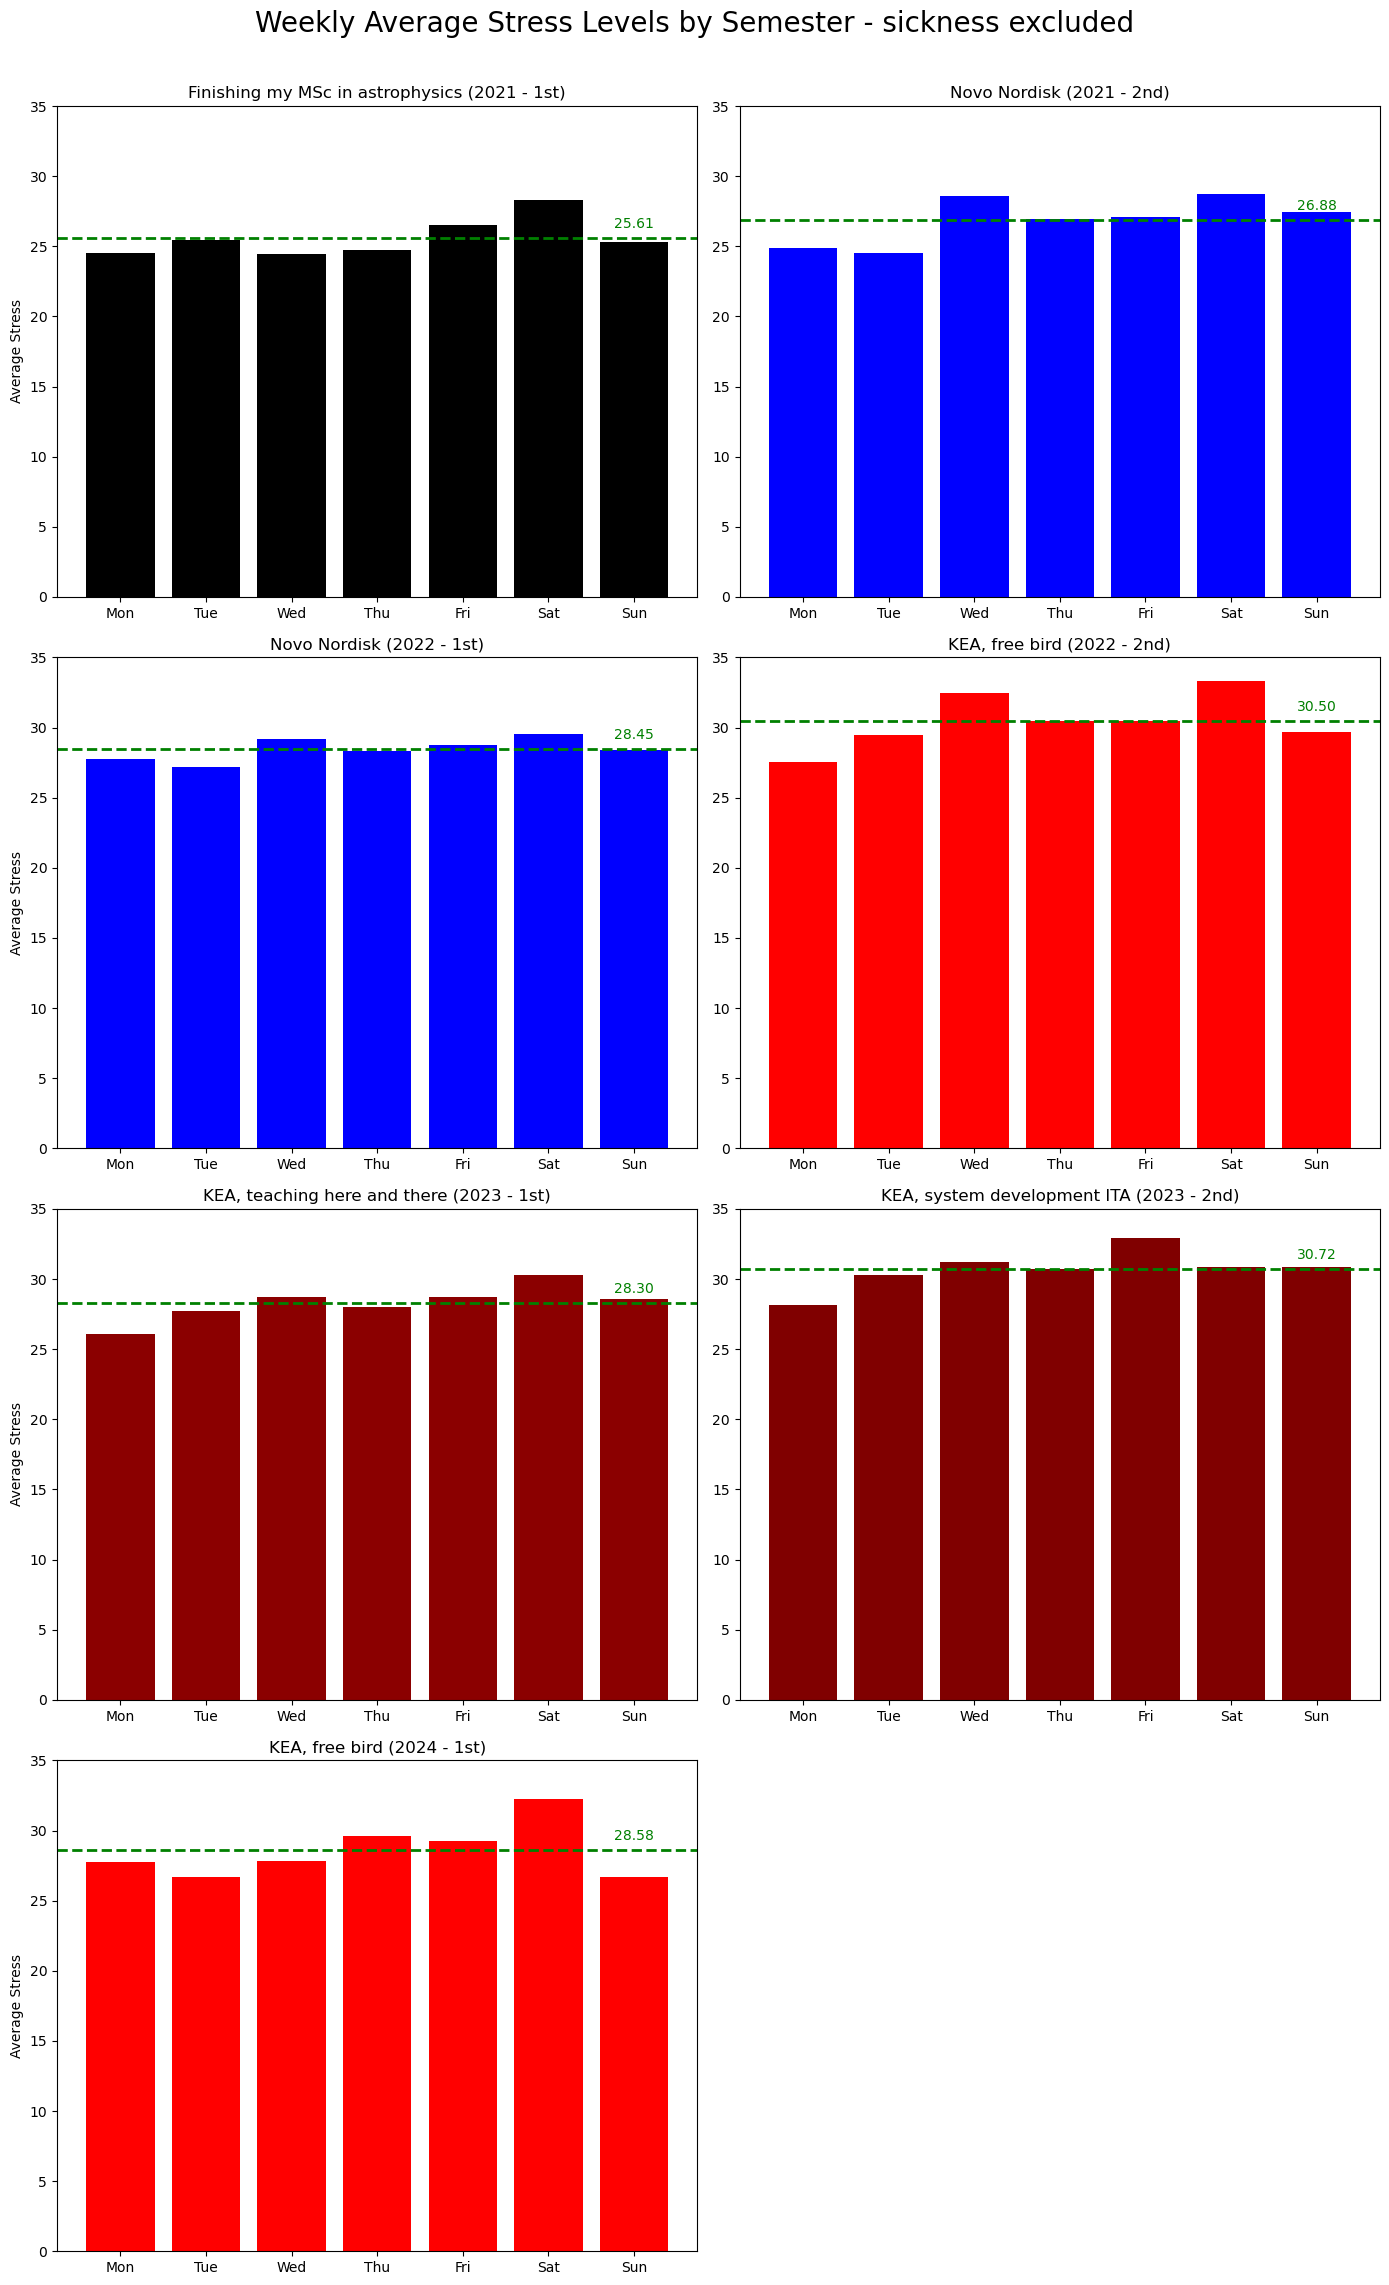

In [532]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 24))  # Adjusted for additional plots
fig.suptitle('Weekly Average Stress Levels by Semester - sickness excluded', fontsize=20)

# Flatten axes for easy iteration
axes = axes.flatten()

# Number of semesters to plot
num_semesters = len(labels_colors)

# Total number of subplots (rows * columns)
total_plots = 4 * 2  # Update this based on the actual layout of nrows x ncols

# Plot each semester's data in a different subplot
for i, (semester, data) in enumerate(weekday_stress_per_semester_excl_sick.iterrows()):
    if i >= num_semesters:
        break  # Break if there are more subplots than semesters
    ax = axes[i]
    color = labels_colors[semester][1]
    ax.bar(x=data.index, height=data.values, color=color)
    ax.set_title(f"{labels_colors[semester][0]} ({semester})", fontsize=12)
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    ax.set_ylabel('Average Stress' if i % 2 == 0 else '')
    ax.set_ylim(0, 35)
    mean_stress = data.mean()
    ax.axhline(y=mean_stress, color='green', linestyle='--', linewidth=2)
    ax.text(data.index[-1], mean_stress + 0.5, f'{mean_stress:.2f}', color='green', ha='center', va='bottom')

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.subplots_adjust(top=0.94)  # Adjust this value to reduce the space after the title
plt.show()


## Sleep and stress on weekdays vs weekends?

In [536]:
# Assume 'Weekday' column exists with Monday as 0 through Sunday as 6
health_df['Day Type'] = health_df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [537]:
# Calculating mean, standard deviation, and CV for weekdays and weekends
day_type_summary = health_df.groupby('Day Type').agg({
    'resting_HR': ['mean', 'std', lambda x: np.std(x) / np.mean(x)],
    'average_stress': ['mean', 'std', lambda x: np.std(x) / np.mean(x)],
    'sleeping_hours': ['mean', 'std', lambda x: np.std(x) / np.mean(x)]
}).rename(columns={'<lambda_0>': 'CV'})

print(day_type_summary)


         resting_HR                     average_stress                      \
               mean       std        CV           mean       std        CV   
Day Type                                                                     
Weekday   59.489775  4.003376  0.067261      27.972393  6.070235  0.216897   
Weekend   60.186224  3.948325  0.065518      29.242347  7.315677  0.249855   

         sleeping_hours                      
                   mean       std        CV  
Day Type                                     
Weekday        7.677476  1.309423  0.170466  
Weekend        7.963609  1.728022  0.216709  


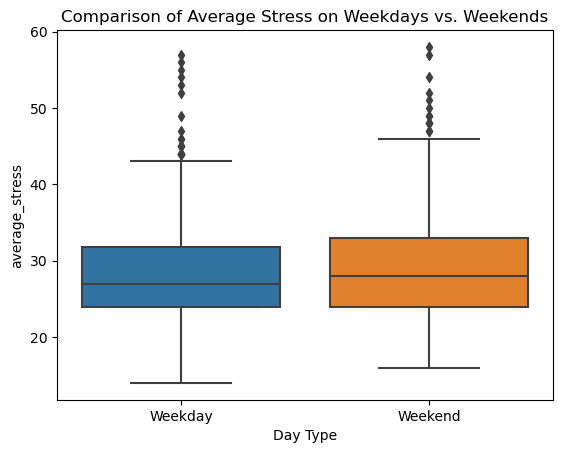

In [538]:
# Plotting the average stress levels by day type
sns.boxplot(x='Day Type', y='average_stress', data=health_df)
plt.title('Comparison of Average Stress on Weekdays vs. Weekends')
plt.show()


In [539]:
# t-test for average stress
weekday_stress = health_df[health_df['Day Type'] == 'Weekday']['average_stress']
weekend_stress = health_df[health_df['Day Type'] == 'Weekend']['average_stress']
t_stat, p_val = stats.ttest_ind(weekday_stress, weekend_stress, equal_var=False)

print(f"T-test results -- t-statistic: {t_stat}, p-value: {p_val}")


T-test results -- t-statistic: -3.0426904278339117, p-value: 0.0024442650490131513


**Notes** 

- The negative T-vaue suggests that *weekdays* have a *lower* average stress value than weekends, which aligns well with stress-levels probably mainly being influenced by alcohol rather than daily stress.

- A p-value of 0.0024 (< 0.05) means there is a 0.24% chance of seeing this large a difference by chance. This is quite low, which suggests that the difference in stress levels between weekdays and weekends is statistically significant.


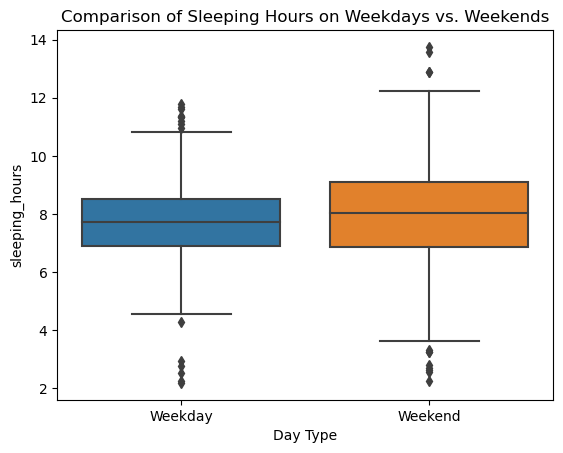

In [540]:
# Plotting the average stress levels by day type
sns.boxplot(x='Day Type', y='sleeping_hours', data=health_df)
plt.title('Comparison of Sleeping Hours on Weekdays vs. Weekends')
plt.show()


In [541]:
# Drop NaN values specifically in the sleeping_hours before the t-test
weekday_sleep = health_df[health_df['Day Type'] == 'Weekday']['sleeping_hours'].dropna()
weekend_sleep = health_df[health_df['Day Type'] == 'Weekend']['sleeping_hours'].dropna()

t_stat, p_val = stats.ttest_ind(weekday_sleep, weekend_sleep, equal_var=False)
print(f"T-test results -- t-statistic: {t_stat}, p-value: {p_val}")


T-test results -- t-statistic: -2.9398937818959046, p-value: 0.0034163435118060594


**Notes:**
- The negative T-vaue suggests that *weekdays* have a *lower* average sleeping hours which makes sense. 

- A p-value of 0.0034 means there is a 0.34% chance of seeing this large a difference by chance. This means it's a signiticant result.

### Notes for the weekdays and weekend analysis of stress and sleep:
- Sleeping more during the weekends could suggest "catch up sleep", but as the stress level is also higher duting the weekends, it would suggest occasional habits of drinking more alcohol before the weekend and therefore sleeping more.
- *It could be intersting to see how the sleep quality is for weekend vs weekdays. Hypothesis: less deep sleep in the weekends, or at least a lower percentage.*

## Testing for sleep quality on weekdays vs weekends

In [542]:
# Convert 'calendarDate' to datetime
sleep_df['calendarDate'] = pd.to_datetime(sleep_df['calendarDate'])

# Extract the day of the week (Monday=0, Sunday=6)
sleep_df['Weekday'] = sleep_df['calendarDate'].dt.dayofweek

# Classify as 'Weekday' or 'Weekend'
sleep_df['Day Type'] = sleep_df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


### Calculate Sleep Durations and Percentages


In [543]:
# Calculate total sleep time excluding unmeasurable seconds
sleep_df['TotalSleepSeconds'] = sleep_df['deepSleepSeconds'] + sleep_df['lightSleepSeconds'] + sleep_df['remSleepSeconds'] + sleep_df['awakeSleepSeconds']

# Calculate percentages of each sleep stage
sleep_df['DeepSleepPct'] = sleep_df['deepSleepSeconds'] / sleep_df['TotalSleepSeconds']
sleep_df['LightSleepPct'] = sleep_df['lightSleepSeconds'] / sleep_df['TotalSleepSeconds']
sleep_df['RemSleepPct'] = sleep_df['remSleepSeconds'] / sleep_df['TotalSleepSeconds']
sleep_df['AwakeSleepPct'] = sleep_df['awakeSleepSeconds'] / sleep_df['TotalSleepSeconds']


### Aggregate and Compare Metrics by Day Type


In [544]:
# Group by Day Type and calculate mean for each sleep stage percentage
sleep_summary = sleep_df.groupby('Day Type').agg({
    'DeepSleepPct': 'mean',
    'LightSleepPct': 'mean',
    'RemSleepPct': 'mean',
    'AwakeSleepPct': 'mean'
}).reset_index()

print(sleep_summary)


  Day Type  DeepSleepPct  LightSleepPct  RemSleepPct  AwakeSleepPct
0  Weekday      0.147492       0.622604     0.212935       0.016970
1  Weekend      0.157509       0.607774     0.214933       0.019785


In [545]:
from scipy import stats

# T-test for deep sleep percentage between weekdays and weekends
weekday_deep = sleep_df[sleep_df['Day Type'] == 'Weekday']['DeepSleepPct']
weekend_deep = sleep_df[sleep_df['Day Type'] == 'Weekend']['DeepSleepPct']
t_stat, p_val = stats.ttest_ind(weekday_deep.dropna(), weekend_deep.dropna(), equal_var=False)

print(f"Deep Sleep Percentage - T-test results -- t-statistic: {t_stat}, p-value: {p_val}")


Deep Sleep Percentage - T-test results -- t-statistic: -2.227189606721953, p-value: 0.02628331799769246


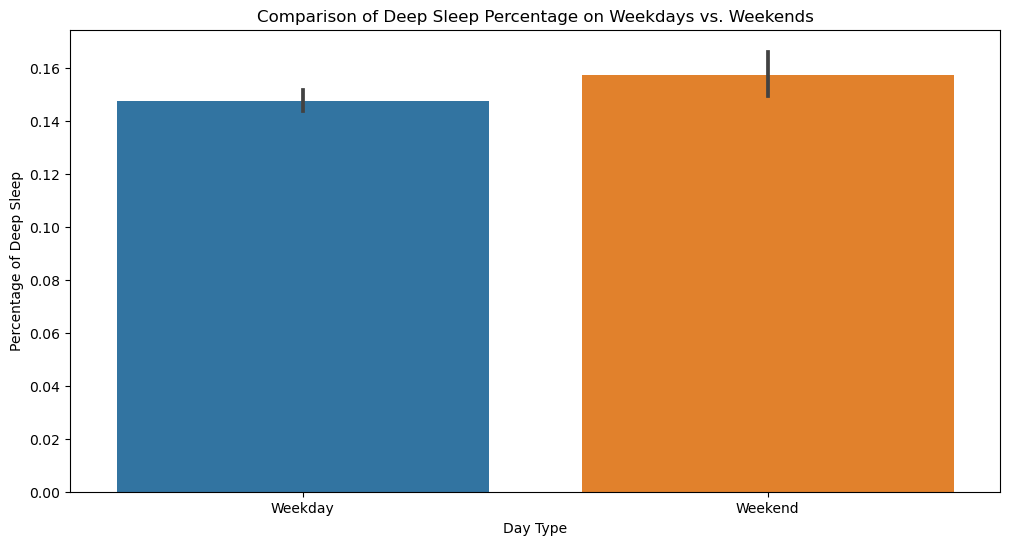

In [546]:
# Visualizing sleep percentages
plt.figure(figsize=(12, 6))
sns.barplot(x='Day Type', y='DeepSleepPct', data=sleep_df)
plt.title('Comparison of Deep Sleep Percentage on Weekdays vs. Weekends')
plt.ylabel('Percentage of Deep Sleep')
plt.show()


## So I guess I was wrong!

I get a higher percentage of deep sleep in the weekends and the p-value suggests significans.

## NEW! Testing for lecturing days in 2023 and how much impact they might have had on stress

**Note:** This was done AFTER all the rest of the analysis. 

- Lecturing: 0 = none
- Lecturing: 1 = no or little preparation, like exam as sensor, asssting or having a guest lecturer
- Lecturing: 2 = with a lot of preparation

Analysing stress levels on the days, but also 3 days prior to a lecturing 2 event especially.

### Flag lecturing days: 0, 1 (contact, no or little preparation), 2 (with preparation)

In [574]:
health_df[health_df['Lecturing'] == 0]

# List of dates for Lecturing with little or no preparation
lecturing_dates_1 = pd.to_datetime(['2023-02-08', '2023-04-25', '2023-05-01', '2023-05-16', '2023-06-05', '2023-06-06', 
                     '2023-06-07', '2023-06-08', '2023-06-09', '2023-08-15', '2023-10-24', '2023-10-31',
                    '2023-02-27', '2023-03-06', '2023-03-13', '2023-03-20', '2023-03-27'])

# List of dates for Lecturing with preparation
lecturing_dates_2 = pd.to_datetime(['2021-04-23', '2022-11-11', '2023-02-17', '2023-02-26', '2023-03-21', '2023-04-18', '2023-04-21', '2023-09-05',
                     '2023-05-21', '2023-09-12', '2023-09-19', '2023-09-26', '2023-09-03', '2023-11-07', 
                     '2023-11-16', '2023-09-14', '2023-10-05', '2023-11-27', '2023-12-04'])

# Update for Lecturing
health_df.loc[health_df.index.isin(lecturing_dates_1), 'Lecturing'] = 1
health_df.loc[health_df.index.isin(lecturing_dates_2), 'Lecturing'] = 2


In [575]:
# Re-mark the actual lecturing days just to ensure they remain marked correctly
health_df.loc[lecturing_days_1, 'Pre-Lecturing'] = 1
health_df.loc[lecturing_days_2, 'Pre-Lecturing'] = 2

# Find dates where Lecturing is 1 or 2
lecturing_days_1 = health_df[health_df['Lecturing'] == 1].index
lecturing_days_2 = health_df[health_df['Lecturing'] == 2].index

# Function to mark pre-lecturing days
def mark_pre_lecturing_days(days_list, days_prior):
    pre_days = pd.DatetimeIndex([])
    for day in days_list:
        pre_days = pre_days.union(pd.date_range(start=day - pd.Timedelta(days=days_prior), end=day - pd.Timedelta(days=1)))
    return pre_days

# Choose the new number of days to mark prior to lecturing days
days_prior = 2

# Mark pre-lecturing days for Lecturing 1 and 2 with the updated days prior
pre_lecturing_days_1 = mark_pre_lecturing_days(lecturing_days_1, days_prior)
pre_lecturing_days_2 = mark_pre_lecturing_days(lecturing_days_2, days_prior)

# Add a column to health_df to mark pre-lecturing days
#health_df['Pre-Lecturing'] = 0
health_df.loc[pre_lecturing_days_1, 'Pre-Lecturing'] = 1
health_df.loc[pre_lecturing_days_2, 'Pre-Lecturing'] = 2


In [576]:
# Average stress on normal days, pre-lecturing days, and lecturing days
average_stress_normal = health_df[health_df['Lecturing'] == 0]['average_stress'].mean()
average_stress_pre_lecturing_1 = health_df[health_df['Pre-Lecturing'] == 1]['average_stress'].mean()
average_stress_pre_lecturing_2 = health_df[health_df['Pre-Lecturing'] == 2]['average_stress'].mean()
average_stress_lecturing_1 = health_df[health_df['Lecturing'] == 1]['average_stress'].mean()
average_stress_lecturing_2 = health_df[health_df['Lecturing'] == 2]['average_stress'].mean()

print("Average Stress on Normal Days:", average_stress_normal)
print("Average Stress on Pre-Lecturing Days (Category 1):", average_stress_pre_lecturing_1)
print("Average Stress on Pre-Lecturing Days (Category 2):", average_stress_pre_lecturing_2)
print("Average Stress on Lecturing Days (Category 1):", average_stress_lecturing_1)
print("Average Stress on Lecturing Days (Category 2):", average_stress_lecturing_2)


Average Stress on Normal Days: 28.306596701649177
Average Stress on Pre-Lecturing Days (Category 1): 28.634615384615383
Average Stress on Pre-Lecturing Days (Category 2): 30.202898550724637
Average Stress on Lecturing Days (Category 1): 26.529411764705884
Average Stress on Lecturing Days (Category 2): 32.0


In [577]:
# Print out counts of days marked for lecturing to see if any days are actually being marked
print("Count of Pre-Lecturing Days (Category 1):", health_df[health_df['Pre-Lecturing'] == 1].shape[0])
print("Count of Pre-Lecturing Days (Category 2):", health_df[health_df['Pre-Lecturing'] == 2].shape[0])
print("Count of Lecturing Days (Category 1):", health_df[health_df['Lecturing'] == 1].shape[0])
print("Count of Lecturing Days (Category 2):", health_df[health_df['Lecturing'] == 2].shape[0])


Count of Pre-Lecturing Days (Category 1): 52
Count of Pre-Lecturing Days (Category 2): 69
Count of Lecturing Days (Category 1): 17
Count of Lecturing Days (Category 2): 19


In [578]:
from scipy.stats import ttest_ind

# T-test between normal days and lecturing category 2 days
t_stat, p_val = ttest_ind(
    health_df[health_df['Lecturing'] == 2]['average_stress'].dropna(),
    health_df[health_df['Lecturing'] == 0]['average_stress'].dropna()
)
print("T-test Between Normal and Lecturing Category 2 Days: T-stat = {}, P-value = {}".format(t_stat, p_val))


T-test Between Normal and Lecturing Category 2 Days: T-stat = 2.466878163334935, P-value = 0.013752988111907203


## ^ T-test shows statistical significance of stress levels on and before category 2 teaching

Let's visualise it 

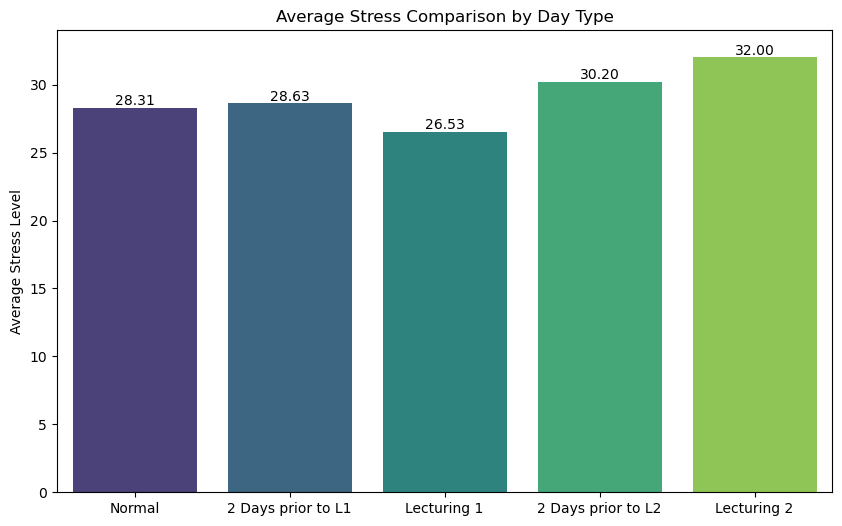

In [579]:
# Data preparation for plotting
categories = ['Normal', '2 Days prior to L1', 'Lecturing 1', '2 Days prior to L2', 'Lecturing 2']
stress_levels = [
    average_stress_normal,
    average_stress_pre_lecturing_1,
    average_stress_lecturing_1,
    average_stress_pre_lecturing_2,
    average_stress_lecturing_2
]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=stress_levels, palette="viridis")
plt.title('Average Stress Comparison by Day Type')
plt.ylabel('Average Stress Level')
#plt.xlabel('Day Category')
plt.ylim(0, max(stress_levels) + 2)  # Set y-limit slightly higher than max for better visualization

# Annotate the bars with the exact stress levels for clarity
for i, v in enumerate(stress_levels):
    plt.text(i, v + 0.2, "{:.2f}".format(v), ha='center', va='baseline')

plt.show()


AHA! 

But wait ... when I chose only to look at year 2023, and comparing data there, the stress level for non-teaching days rises, and shows non-significant values for lecturing 2 days compared to others:

- Using all data (even thoigh lecturing 2 days were only in 2023 - I might have missed some from 2022 though and my life thesis presentation in 2021):
    - T-test Between Normal and Lecturing Category 2 Days: T-stat = 2.6704361766498947, P-value = 0.007666179572195184

- Only 2023:
    - T-test Between Normal and Lecturing Category 2 Days: T-stat = 1.553087492483967, P-value = 0.12131641392998063


So showing the significance really depends on whether I take the whole data into account (for all 3 years, where stress level was also less in general in the earlier years) or only use 2023. 

But why the 3 days prior? Maybe I can twitch to only look at 2 days prior? Maybe I van use machine learning to tell me when there is significant stress days before a lecturing 2 day? 

Also todo:
- Add the lecturing for GC1 and GC2 in 2022 and add my thesis presentation in 2021.



##  Calplot of stress levels

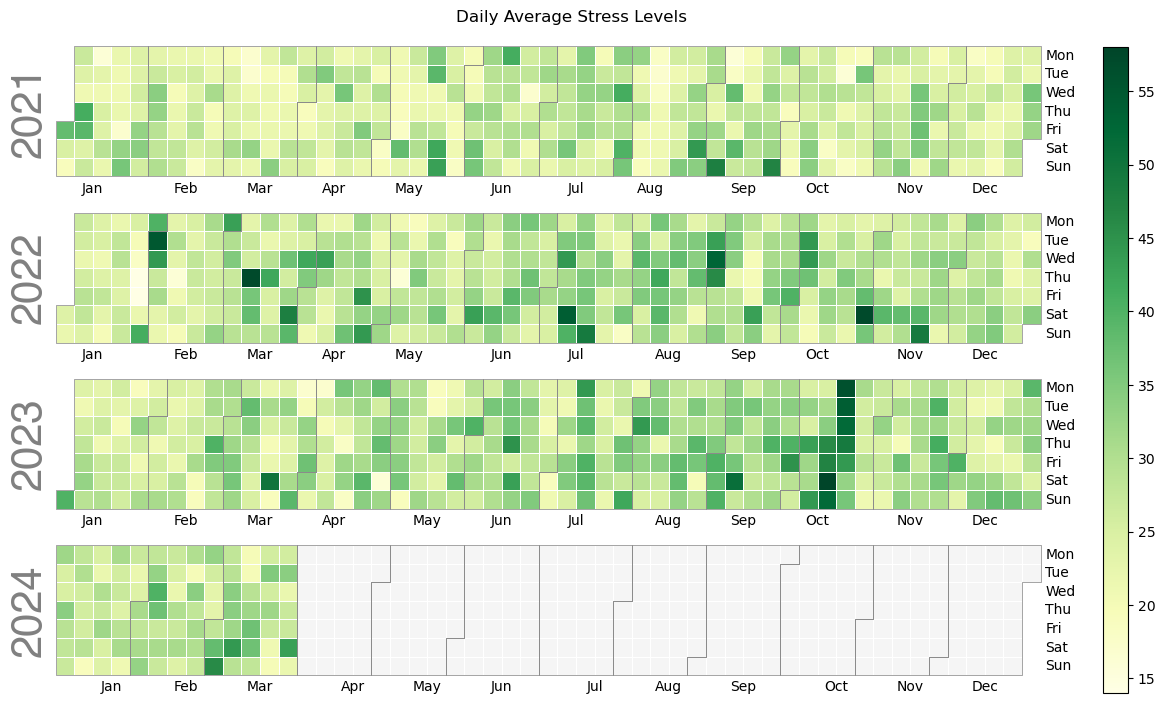

In [580]:
import calplot

calplot.calplot(data=health_df['average_stress'], cmap='YlGn', linewidth=0.5, 
                how='mean', suptitle='Daily Average Stress Levels')

plt.show()


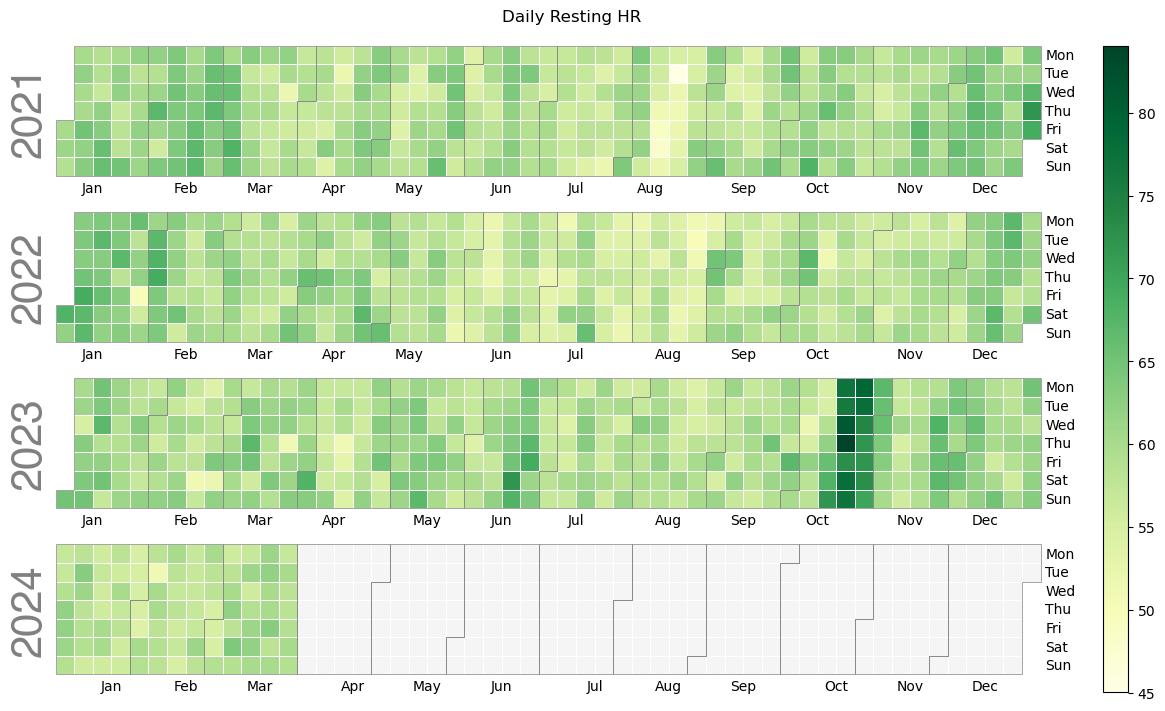

In [581]:
calplot.calplot(data=health_df['resting_HR'], cmap='YlGn', linewidth=0.5, 
                how='mean', suptitle='Daily Resting HR')

plt.show()


# Analysis of seasonal trends

In [582]:
seasonal_summary = health_df.groupby('YearSemester').agg({
    'resting_HR': ['mean', 'median', 'std', 'min', 'max'],
    'average_stress': ['mean', 'median', 'std', 'min', 'max'],
    'sleeping_hours': ['mean', 'median', 'std', 'min', 'max']
})

print(seasonal_summary)

             resting_HR                          average_stress         \
                   mean median       std min max           mean median   
YearSemester                                                             
2021 - 1st    60.364641   60.0  3.329943  52  68      25.618785   24.0   
2021 - 2nd    59.532609   59.0  4.018896  45  72      26.880435   26.5   
2022 - 1st    59.922652   60.0  3.659779  50  69      28.453039   27.0   
2022 - 2nd    58.043478   58.0  3.578665  50  67      30.510870   30.0   
2023 - 1st    60.121547   60.0  3.463561  51  72      28.292818   28.0   
2023 - 2nd    61.027174   60.0  5.446643  52  84      31.548913   31.0   
2024 - 1st    58.274725   58.0  2.304903  51  64      28.582418   28.0   

                               sleeping_hours                                \
                   std min max           mean    median       std       min   
YearSemester                                                                  
2021 - 1st    5.481634

### Seasonal variation analysis

Measure the seasonal variation using the coefficient of variation (CV), which is the ratio of the standard deviation to the mean. This can help understand the relative variability in each semester.

In [583]:
seasonal_variation = health_df.groupby('YearSemester').agg({
    'resting_HR': lambda x: np.std(x) / np.mean(x),
    'average_stress': lambda x: np.std(x) / np.mean(x),
    'sleeping_hours': lambda x: np.std(x) / np.mean(x)
}).rename(columns={'resting_HR': 'HR_CV', 'average_stress': 'Stress_CV', 'sleeping_hours': 'Sleep_CV'})

print(seasonal_variation)


                 HR_CV  Stress_CV  Sleep_CV
YearSemester                               
2021 - 1st    0.055011   0.213377  0.137014
2021 - 2nd    0.067416   0.214540  0.157243
2022 - 1st    0.060906   0.235240  0.202115
2022 - 2nd    0.061487   0.217486  0.216310
2023 - 1st    0.057450   0.204437  0.197695
2023 - 2nd    0.089007   0.233877  0.182473
2024 - 1st    0.039334   0.185281  0.173251


**Notes:** Not really that big differences, except the 2nd semester of 2023 have a higher variability in HR, which makes sense as this was with the feverish 18-day period of sickness. 

I would have expected the Stress CV to be higher than it is in the same semester, but it seems it is not higher than in the 1st semester of 2022, where I defended my thesis and got to try to figure out my future life.  

*It's worth to note that the physiological stress is often very much due to drinking alcohol, so perhaps it could be interesting to split those variablities into weekdays and weekends?*

### Trend Analysis Using Time Series Decomposition

In [585]:
# Check if 'Date' is a column and convert it to a datetime index if necessary
if 'Date' in health_df.columns:
    health_df['Date'] = pd.to_datetime(health_df['Date'])  # Convert 'Date' to datetime if it's a column
    health_df.set_index('Date', inplace=True)  # Set 'Date' as the index

# If 'Date' is already the index, just ensure it's in datetime format
elif not isinstance(health_df.index, pd.DatetimeIndex):
    health_df.index = pd.to_datetime(health_df.index)

# Now, sort the index to ensure data continuity
health_df.sort_index(inplace=True)


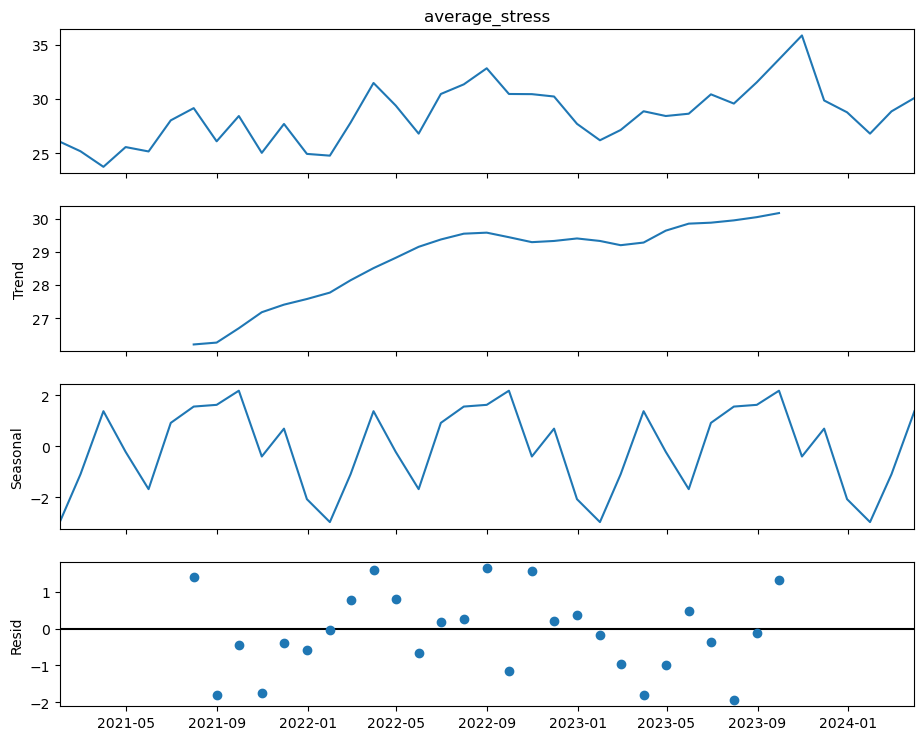

In [587]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the monthly data
result = seasonal_decompose(monthly_data, model='additive')
fig = result.plot()

# Adjust the size of the plot if necessary
fig.set_size_inches(10, 8)
plt.show()

### Regression Analysis to Model Trends Over Time
Fit a linear regression model to see if there's a statistically significant trend over time in stress, heart rate, or sleep.

In [588]:
import statsmodels.api as sm

# Numeric representation of semesters for regression; assuming semesters are consistently labeled and ordered
health_df['Time'] = pd.factorize(health_df['YearSemester'])[0] + 1

# Fit linear regression
X = sm.add_constant(health_df['Time'])  # Adds a constant term to the predictor
Y = health_df['average_stress']
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         average_stress   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     75.64
Date:                Sun, 05 May 2024   Prob (F-statistic):           9.60e-18
Time:                        14:36:04   Log-Likelihood:                -4465.4
No. Observations:                1370   AIC:                             8935.
Df Residuals:                    1368   BIC:                             8945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5154      0.366     69.657      0.0

**Notes:**

- R-squared (0.052): This value indicates that about 5.2% of the variability in average stress is explained by the time variable (progression of semesters). This is a relatively low value, which suggests that many other unaccounted factors are influencing stress levels.

- Other factors? Try decompose weekdays / weekends as weekday stress might be more relevant to workload and a high variablitiy in weekend stress would mean I have more energy to go out with friends

# Adding emotions


## Load mood file and add categories

In [589]:
#emot_df = pd.read_csv("HowWeFeelEmotions.csv")
#emot_df = emot_df[['Date', 'Mood', 'Tags', 'Weather']]
#pd.to_cvs("HowWeFeelEmotions.csv")

emot_df = pd.read_csv("HowWeFeelEmotions2.csv")
emot_df

,Unnamed: 0,Date,Mood,Tags,Weather
0,0,2024 Tue Apr 23 12:55 PM,Amused,Outside;Co-workers;Hanging out,scattered clouds
1,1,2024 Mon Apr 22 9:20 PM,Chill,Resting;By myself;Vacation home;Watching shows,broken clouds
2,2,2024 Mon Apr 22 3:56 PM,Tired,Co-workers;Networking;Work,broken clouds
3,3,2024 Sun Apr 21 9:38 PM,Good,Resting;Vacation home;By myself,few clouds
4,4,2024 Sun Apr 21 5:03 PM,Enthusiastic,Commuting;Strangers;Between places,overcast clouds
...,...,...,...,...,...
709,709,2023 Tue Jun 6 6:31 PM,Satisfied;Tired,Home;Resting;Pets,NaN
710,710,2023 Tue Jun 6 7:27 AM,At Ease;Mellow,Home;Back from run;By myself,NaN
711,711,2023 Mon Jun 5 8:27 PM,Balanced,Home;Resting;By myself,NaN
712,712,2023 Mon Jun 5 8:22 PM,Lonely,Home;Resting;By myself,NaN


### **Important sidenote:** As I only have logged emotions since June 5th 2023, I will make it a side project to use Python spaCy library to analyse my journal for emotions with the same categories as below. 

In [590]:
# Split the 'Mood' column where there are semicolons
emot_df['Moods'] = emot_df['Mood'].str.split(';')

# Use explode to create a new row for each mood in the 'Moods' list
emot_df = emot_df.explode('Moods')

# Strip any leading or trailing whitespace characters that might be created during the split
emot_df['Moods'] = emot_df['Moods'].str.strip()


In [591]:
# Adding categoruies and colors to the Moods, as the exported data doesn't have this informstion
# ChatGPT did the categorising

emotion_categories = {
    'Amused': 'High Energy, Positive',
    'Chill': 'Low Energy, Positive',
    'Tired': 'Low Energy, Negative',
    'Good': 'Low Energy, Positive',
    'Enthusiastic': 'High Energy, Positive',
    'Satisfied': 'Low Energy, Positive',
    'At Ease': 'Low Energy, Positive',
    'Balanced': 'Low Energy, Positive',
    'Lonely': 'Low Energy, Negative',
    'Thoughtful': 'Low Energy, Positive',
    'Pensive': 'Low Energy, Positive',
        'Accomplished': 'High Energy, Positive',
    'Excited': 'High Energy, Positive',
    'Longing': 'Low Energy, Negative',
    'Optimistic': 'High Energy, Positive',
    'Sad': 'Low Energy, Negative',
    'Productive': 'High Energy, Positive',
    'Relaxed': 'Low Energy, Positive',
    'Wistful': 'Low Energy, Negative',
    'Anxious': 'High Energy, Negative',
    'Meh': 'Low Energy, Negative',
    'Apathetic': 'Low Energy, Negative',
    'Challenged': 'High Energy, Negative',
    'Fatigued': 'Low Energy, Negative',
    'Melancholic': 'Low Energy, Negative',
    'Annoyed': 'High Energy, Negative',
    'Determined': 'High Energy, Positive',
    'Motivated': 'High Energy, Positive',
    'Empowered': 'High Energy, Positive',
    'Nostalgic': 'Low Energy, Negative',
    'Worried': 'High Energy, Negative',
    'Relieved': 'Low Energy, Positive',
    'Lost': 'Low Energy, Negative',
    'Joyful': 'High Energy, Positive',
    'Nervous': 'High Energy, Negative',
    'Disengaged': 'Low Energy, Negative',
    'Empty': 'Low Energy, Negative',
    'Grateful': 'Low Energy, Positive',
    'Confident': 'High Energy, Positive',
    'Proud': 'High Energy, Positive',
    'Curious': 'High Energy, Positive',
    'Frustrated': 'High Energy, Negative',
    'Exhausted': 'Low Energy, Negative',
    'Connected': 'High Energy, Positive',
    'Calm': 'Low Energy, Positive',
    'Restless': 'High Energy, Negative',
    'Overwhelmed': 'High Energy, Negative',
    'Happy': 'High Energy, Positive',
    'Appreciated': 'High Energy, Positive',
    'Disappointed': 'Low Energy, Negative',
    'Peaceful': 'Low Energy, Positive',
    'Insecure': 'Low Energy, Negative',
    'Discouraged': 'Low Energy, Negative',
    'Upbeat': 'High Energy, Positive',
    'Disconnected': 'Low Energy, Negative',
    'Valued': 'High Energy, Positive',
    'Down': 'Low Energy, Negative',
    'Mellow': 'Low Energy, Positive',
    'Inspired': 'High Energy, Positive',
    'Confused': 'Low Energy, Negative',
    'Vulnerable': 'Low Energy, Negative',
    'Trapped': 'Low Energy, Negative',
    'Wishful': 'Low Energy, Negative',
    'Cheerful': 'High Energy, Positive',
    'Tense': 'High Energy, Negative',
    'Hopeful': 'High Energy, Positive',
    'Playful': 'High Energy, Positive',
    'Sympathetic': 'Low Energy, Positive',
    'Desire': 'High Energy, Positive',
    'Engaged': 'High Energy, Positive',
    'Resigned': 'Low Energy, Negative',
    'Energized': 'High Energy, Positive',
    'Compassionate': 'Low Energy, Positive',
    'Loving': 'High Energy, Positive',
    'Burned Out': 'Low Energy, Negative',
    'Comfortable': 'Low Energy, Positive',
    'Content': 'Low Energy, Positive',
    'Envious': 'Low Energy, Negative',
    'Spent': 'Low Energy, Negative',
        'Alive': 'High Energy, Positive',
    'Uncertain': 'Low Energy, Negative',
    'Fulfilled': 'High Energy, Positive',
    'Included': 'High Energy, Positive',
    'Pleased': 'High Energy, Positive',
    'Regretful': 'Low Energy, Negative',
    'Excluded': 'Low Energy, Negative',
    'Eager': 'High Energy, Positive',
    'Safe': 'Low Energy, Positive',
    'Tranquil': 'Low Energy, Positive',
    'Inadequate': 'Low Energy, Negative',
    'Understood': 'High Energy, Positive',
    'Empathetic': 'Low Energy, Positive',
    'Helpless': 'Low Energy, Negative',
    'Thankful': 'Low Energy, Positive',
    'Ashamed': 'Low Energy, Negative',
    'Focused': 'High Energy, Positive',
    'Alienated': 'Low Energy, Negative',
    'Pressured': 'High Energy, Negative',
    'Angry': 'High Energy, Negative',
    'Accepted': 'High Energy, Positive',
    'Ecstatic': 'High Energy, Positive',
    'Glum': 'Low Energy, Negative',
    'Disgusted': 'Low Energy, Negative',
    'Pessimistic': 'Low Energy, Negative',
    'Exhilarated': 'High Energy, Positive',
    'Rejected': 'Low Energy, Negative',
    'Irritated': 'High Energy, Negative',
    'Concerned': 'High Energy, Negative',
    'Successful': 'High Energy, Positive',
    'Gaslit': 'Low Energy, Negative',
    'Grumpy': 'Low Energy, Negative',
    'Pleasant': 'Low Energy, Positive',
    'Delighted': 'High Energy, Positive',
    'Uneasy': 'Low Energy, Negative',
    'Enjoyment': 'High Energy, Positive',
    'Fomo': 'High Energy, Negative',
    'Surprised': 'High Energy, Positive',
    'Miserable': 'Low Energy, Negative',
    'Competent': 'High Energy, Positive',
    'Carefree': 'High Energy, Positive',
    'Scared': 'Low Energy, Negative',
    'Bored': 'Low Energy, Negative'
}

# Apply the mapping to categorize moods
emot_df['EmotionCat'] = emot_df['Moods'].apply(lambda x: emotion_categories.get(x, 'Unknown'))


## Merge mood stats with health stats

- There are several moods during a day - Makes it hard to join the table with health_df ...
- Date in emot_df should be split into date, time and weekday
- Perhaps add the average_stress and resting_HR from health_df to each date in emot_df instead


In [592]:
# Convert 'Date' to datetime
emot_df['DateTime'] = pd.to_datetime(emot_df['Date'])

# Extract date, weekday, and time
emot_df['Date'] = emot_df['DateTime'].dt.date
emot_df['Weekday'] = emot_df['DateTime'].dt.weekday  # Monday=0, Sunday=6
emot_df['Time'] = emot_df['DateTime'].dt.time

#emot_df.drop(['Unnamed: 0'], axis=1, inplace=True)
emot_df

,Unnamed: 0,Date,Mood,Tags,Weather,Moods,EmotionCat,DateTime,Weekday,Time
0,0,2024-04-23,Amused,Outside;Co-workers;Hanging out,scattered clouds,Amused,"High Energy, Positive",2024-04-23 12:55:00,1,12:55:00
1,1,2024-04-22,Chill,Resting;By myself;Vacation home;Watching shows,broken clouds,Chill,"Low Energy, Positive",2024-04-22 21:20:00,0,21:20:00
2,2,2024-04-22,Tired,Co-workers;Networking;Work,broken clouds,Tired,"Low Energy, Negative",2024-04-22 15:56:00,0,15:56:00
3,3,2024-04-21,Good,Resting;Vacation home;By myself,few clouds,Good,"Low Energy, Positive",2024-04-21 21:38:00,6,21:38:00
4,4,2024-04-21,Enthusiastic,Commuting;Strangers;Between places,overcast clouds,Enthusiastic,"High Energy, Positive",2024-04-21 17:03:00,6,17:03:00
...,...,...,...,...,...,...,...,...,...,...
710,710,2023-06-06,At Ease;Mellow,Home;Back from run;By myself,NaN,Mellow,"Low Energy, Positive",2023-06-06 07:27:00,1,07:27:00
711,711,2023-06-05,Balanced,Home;Resting;By myself,NaN,Balanced,"Low Energy, Positive",2023-06-05 20:27:00,0,20:27:00
712,712,2023-06-05,Lonely,Home;Resting;By myself,NaN,Lonely,"Low Energy, Negative",2023-06-05 20:22:00,0,20:22:00
713,713,2023-06-05,Thoughtful;Pensive,Home;Resting;By myself,NaN,Thoughtful,"Low Energy, Positive",2023-06-05 20:17:00,0,20:17:00


In [593]:
# Compute daily averages if not already present
daily_health = health_df.groupby(health_df.index.date).agg({
    'average_stress': 'mean',
    'resting_HR': 'mean'
})

# Since the index is dates, convert it back to a regular column for easier merging later
daily_health.reset_index(inplace=True)
daily_health.rename(columns={'index': 'Date'}, inplace=True)

# Ensure JustDate is in the proper date format if needed
daily_health['Date'] = pd.to_datetime(daily_health['Date']).dt.date


In [594]:
# Ensure the Date conversion in emot_df is only keeping the date part
emot_df['Date'] = pd.to_datetime(emot_df['Date']).dt.date

# Now merge emot_df with daily_health on 'JustDate'
merged_df = pd.merge(emot_df, daily_health, how='left', left_on='Date', right_on='Date')
merged_df

,Unnamed: 0,Date,Mood,Tags,Weather,Moods,EmotionCat,DateTime,Weekday,Time,average_stress,resting_HR
0,0,2024-04-23,Amused,Outside;Co-workers;Hanging out,scattered clouds,Amused,"High Energy, Positive",2024-04-23 12:55:00,1,12:55:00,NaN,NaN
1,1,2024-04-22,Chill,Resting;By myself;Vacation home;Watching shows,broken clouds,Chill,"Low Energy, Positive",2024-04-22 21:20:00,0,21:20:00,NaN,NaN
2,2,2024-04-22,Tired,Co-workers;Networking;Work,broken clouds,Tired,"Low Energy, Negative",2024-04-22 15:56:00,0,15:56:00,NaN,NaN
3,3,2024-04-21,Good,Resting;Vacation home;By myself,few clouds,Good,"Low Energy, Positive",2024-04-21 21:38:00,6,21:38:00,NaN,NaN
4,4,2024-04-21,Enthusiastic,Commuting;Strangers;Between places,overcast clouds,Enthusiastic,"High Energy, Positive",2024-04-21 17:03:00,6,17:03:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1016,710,2023-06-06,At Ease;Mellow,Home;Back from run;By myself,NaN,Mellow,"Low Energy, Positive",2023-06-06 07:27:00,1,07:27:00,36.0,60.0
1017,711,2023-06-05,Balanced,Home;Resting;By myself,NaN,Balanced,"Low Energy, Positive",2023-06-05 20:27:00,0,20:27:00,26.0,58.0
1018,712,2023-06-05,Lonely,Home;Resting;By myself,NaN,Lonely,"Low Energy, Negative",2023-06-05 20:22:00,0,20:22:00,26.0,58.0
1019,713,2023-06-05,Thoughtful;Pensive,Home;Resting;By myself,NaN,Thoughtful,"Low Energy, Positive",2023-06-05 20:17:00,0,20:17:00,26.0,58.0


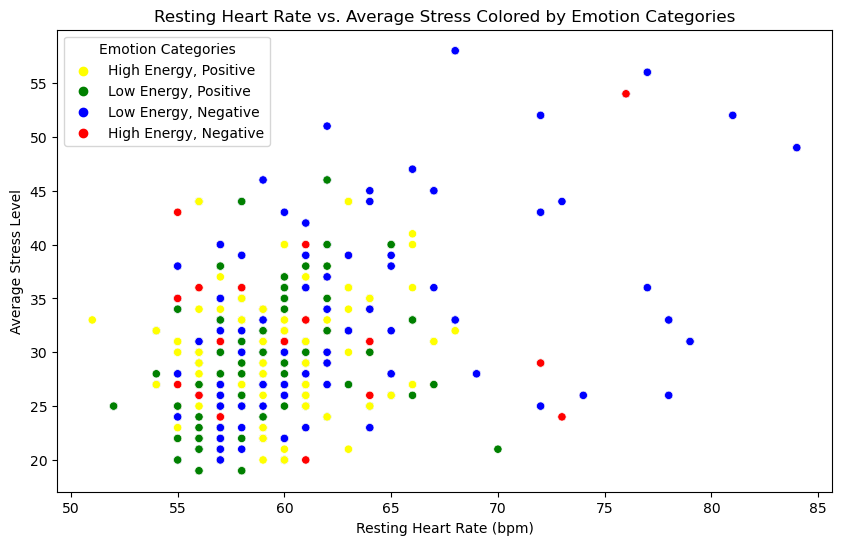

In [595]:
import seaborn as sns

# Define colors for categories
category_colors = {
    'High Energy, Positive': 'yellow',
    'High Energy, Negative': 'red',
    'Low Energy, Positive': 'green',
    'Low Energy, Negative': 'blue'
}

# Create a scatter plot of resting HR vs. average stress colored by Emotion Category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='resting_HR', y='average_stress', hue='EmotionCat', palette=category_colors)
plt.title('Resting Heart Rate vs. Average Stress Colored by Emotion Categories')
plt.xlabel('Resting Heart Rate (bpm)')
plt.ylabel('Average Stress Level')
plt.legend(title='Emotion Categories')
plt.show()

**Note** All high stress and heart rate is with a negative mood (blue and some red), hvis makes sense as these outliers were all due to the sick period in October 2023. 

There doesn't seem to be any patterns in the data points in the restign HR range of 50-65 and aberage stress levels of 20-45. But let's find out.


## K-Means clustering of the scatter plot

### Step 1: Prepare the Data

For K-means clustering, it's important that the data does not contain any missing values and that all features are numeric. Since we’re focusing on resting heart rate (resting_HR) and average stress (average_stress), ensure these are clean and ready for analysis.

**Note to self:** Will it matter that the emotions results in sometimes a double or triple row of same value-pairs of Stress and HR in the merged_df? It might skew the result, reinforcing those days with more than one emotion, right? Perhaps the analysis should be done on the health_df itself

In [596]:
from sklearn.cluster import KMeans

# Check for any NaN values and drop or fill them
healthKM_df = health_df.dropna(subset=['resting_HR', 'average_stress'])

# Optionally, standardize the features (often recommended for clustering)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#merged_df[['resting_HR', 'average_stress']] = scaler.fit_transform(merged_df[['resting_HR', 'average_stress']])

healthKM_df

,resting_HR,average_stress,sleeping_hours,Semester,YearSemester,Sick,Weekday,Lecturing,Day Type,Pre-Lecturing,Time
Date,,,,,,,,,,,
2021-01-01,60,38,8.566667,1,2021 - 1st,False,4,0,Weekday,NaN,1
2021-01-02,61,25,6.916667,1,2021 - 1st,False,5,0,Weekend,NaN,1
2021-01-03,59,19,7.666667,1,2021 - 1st,False,6,0,Weekend,NaN,1
2021-01-04,60,27,7.183333,1,2021 - 1st,False,0,0,Weekday,NaN,1
2021-01-05,62,24,7.566667,1,2021 - 1st,False,1,0,Weekday,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,58,22,9.100000,1,2024 - 1st,False,2,0,Weekday,NaN,7
2024-03-28,58,27,2.233333,1,2024 - 1st,False,3,0,Weekday,NaN,7
2024-03-29,59,27,5.950000,1,2024 - 1st,False,4,0,Weekday,NaN,7


### Step 2: Apply K-means Clustering

Decide on the number of clusters (k). A common method to determine k is the Elbow Method, which involves running the clustering across a range of k values and plotting the total within-cluster sum of squares (inertia).

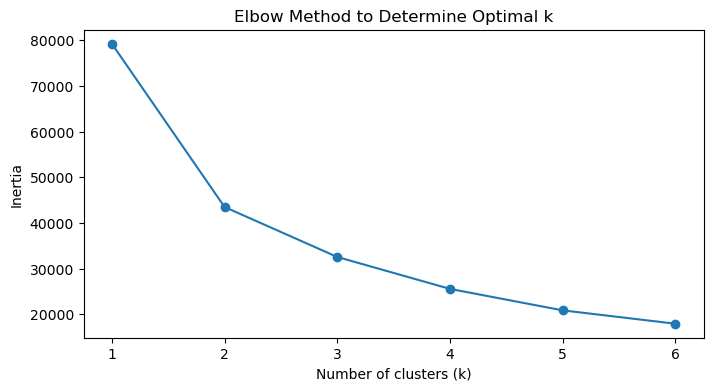

In [597]:
# Elbow method to determine the optimal number of clusters
inertias = []
range_of_k = range(1, 7)  # Testing 1 to 8 clusters

for k in range_of_k:
    model = KMeans(n_clusters=k, n_init=10) #random_state=42
    model.fit(healthKM_df[['resting_HR', 'average_stress']])
    inertias.append(model.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range_of_k, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

### Step 3: Create and Fit the K-means Model
Once you determine the best number of clusters (say, k=3 based on the elbow plot), you can create and fit the K-means model:

In [598]:
k = 2 # number of clusters
kmeans = KMeans(n_clusters=k, n_init=10) #random_state=42)

healthKM_df['Cluster'] = kmeans.fit_predict(healthKM_df[['resting_HR', 'average_stress']])


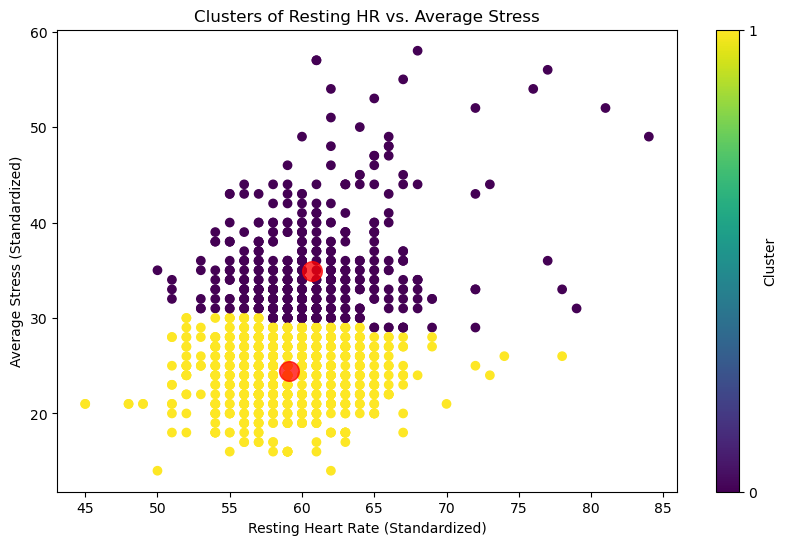

In [599]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(healthKM_df['resting_HR'], healthKM_df['average_stress'], c=healthKM_df['Cluster'], cmap='viridis')
plt.colorbar(ticks=range(k), label='Cluster')
plt.xlabel('Resting Heart Rate (Standardized)')
plt.ylabel('Average Stress (Standardized)')
plt.title('Clusters of Resting HR vs. Average Stress')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Mark the centroids
plt.show()


Hmm ... det kan jeg vist ikke bruge til så meget.

# Further analysis todo (now or later (or never)). Variables:
- *ADD A FLAG OF LECTURING DAYS (teaching and speaker-related)* ***DONE***
- music influence
- drugs such as coffee, shrooms or other
- Cyclus
- Perhaps use journal to analyse emotion, since emotion data is limited
    - Obs: The feeling of stress != physicological stress

# Project 2: Activities and Resting HR

In [600]:
#Running activities 
act_df = pd.read_csv("GarminActivities.csv")
act_df

,Unnamed: 0,VO2,Date,Km,Av_HR_for_Run,run_time,av_cadence
0,0,50.0,2024-05-04,10.02580,145.0,59.124067,174.671875
1,1,50.0,2024-05-02,8.04976,140.0,49.335650,171.328125
2,2,50.0,2024-04-30,5.86950,137.0,35.536633,175.281250
3,3,49.0,2024-04-28,6.81160,138.0,42.716883,175.906250
4,4,49.0,2024-04-26,9.13527,133.0,58.555600,172.281250
...,...,...,...,...,...,...,...
993,993,49.0,2020-11-26,9.01783,138.0,57.006750,183.703125
994,994,49.0,2020-11-25,13.10173,142.0,80.325300,184.406250
995,995,49.0,2020-11-23,4.40349,137.0,26.999217,187.765625
996,996,49.0,2020-11-22,11.34087,133.0,74.884784,182.812500


## What affects resting HR the most: running daily 12-13 km a week on average or running 4 times a week? (and swimming)

Moving this to a separate file ...  